<a href="https://colab.research.google.com/github/aliyanshaikh7/CAD_PCG_Detection/blob/main/CAD_PCG_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q librosa

Import Libraries & Setup Paths

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import librosa
import librosa.display

# project paths
PROJECT_ROOT = '/content/drive/MyDrive/CAD_PCG_Detection'
DATA_FOLDER = f'{PROJECT_ROOT}/CAD_PCG_Dataset'

print(f'Project root: {PROJECT_ROOT}')
print(f'Data folder: {DATA_FOLDER}')

Project root: /content/drive/MyDrive/CAD_PCG_Detection
Data folder: /content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset


Extracting training and validation zip files

In [4]:
import zipfile

training_zip = f'{DATA_FOLDER}/training.zip'
if os.path.exists(training_zip):
  print("Extracting training.zip")
  with zipfile.ZipFile(training_zip, 'r') as zip_ref:
      zip_ref.extractall(DATA_FOLDER)
  os.remove(training_zip)

  print("Training data extracted and zip removed\n")
else:
  print("training.zip not found / already extracted")

validation_zip = f'{DATA_FOLDER}/validation.zip'
if os.path.exists(validation_zip):
  print("Extracting validation.zip")

  with zipfile.ZipFile(validation_zip, 'r') as zip_ref:
      zip_ref.extractall(DATA_FOLDER)
  os.remove(validation_zip)

  print("Validation data extracted and zip removed")
else:
  print("validation.zip not found / already extracted\n")

print("Extraction done")

training.zip not found / already extracted
validation.zip not found / already extracted

Extraction done


Inspecting the number of .wav files in the training datasets


In [5]:

print("CAD_PCG_Dataset folders:")
for item in sorted(os.listdir(DATA_FOLDER)):
    item_path = os.path.join(DATA_FOLDER, item)
    if os.path.isdir(item_path):
        wav_count = len([f for f in os.listdir(item_path) if f.endswith('.wav')])
        print(f"  • {item}: {wav_count} .wav files")

CAD_PCG_Dataset folders:
  • processed_data: 0 .wav files
  • training-a: 409 .wav files
  • training-b: 490 .wav files
  • training-b-e-augmented: 1435 .wav files
  • training-b-e-combined: 2631 .wav files
  • training-c: 31 .wav files
  • training-d: 55 .wav files
  • training-e: 2141 .wav files
  • training-f: 114 .wav files
  • validation: 301 .wav files


Inspecting class balance in training sets B and E (CAD related data)

In [6]:
print("Training-B:")
df_b = pd.read_csv(f'{DATA_FOLDER}/training-b/REFERENCE.csv', header=None, names=['filename', 'label'])

print(f"   Total: {len(df_b)}")
print(f"   Normal: {(df_b['label'] == -1).sum()} ({(df_b['label'] == -1).sum()/len(df_b)*100:.1f}%)")
print(f"   Abnormal: {(df_b['label'] == 1).sum()} ({(df_b['label'] == 1).sum()/len(df_b)*100:.1f}%)\n")


print("Training-E:")
df_e = pd.read_csv(f'{DATA_FOLDER}/training-e/REFERENCE.csv', header=None, names=['filename', 'label'])

print(f"   Total: {len(df_e)}")
print(f"   Normal: {(df_e['label'] == -1).sum()} ({(df_e['label'] == -1).sum()/len(df_e)*100:.1f}%)")
print(f"   Abnormal: {(df_e['label'] == 1).sum()} ({(df_e['label'] == 1).sum()/len(df_e)*100:.1f}%)\n")

print("Combined B + E:")
df_combined = pd.concat([df_b, df_e])

print(f"   Total: {len(df_combined)}")
print(f"   Normal: {(df_combined['label'] == -1).sum()} ({(df_combined['label'] == -1).sum()/len(df_combined)*100:.1f}%)")
print(f"   Abnormal: {(df_combined['label'] == 1).sum()} ({(df_combined['label'] == 1).sum()/len(df_combined)*100:.1f}%)")



Training-B:
   Total: 490
   Normal: 386 (78.8%)
   Abnormal: 104 (21.2%)

Training-E:
   Total: 2141
   Normal: 1958 (91.5%)
   Abnormal: 183 (8.5%)

Combined B + E:
   Total: 2631
   Normal: 2344 (89.1%)
   Abnormal: 287 (10.9%)


Visualise normal vs abnormal heart beat

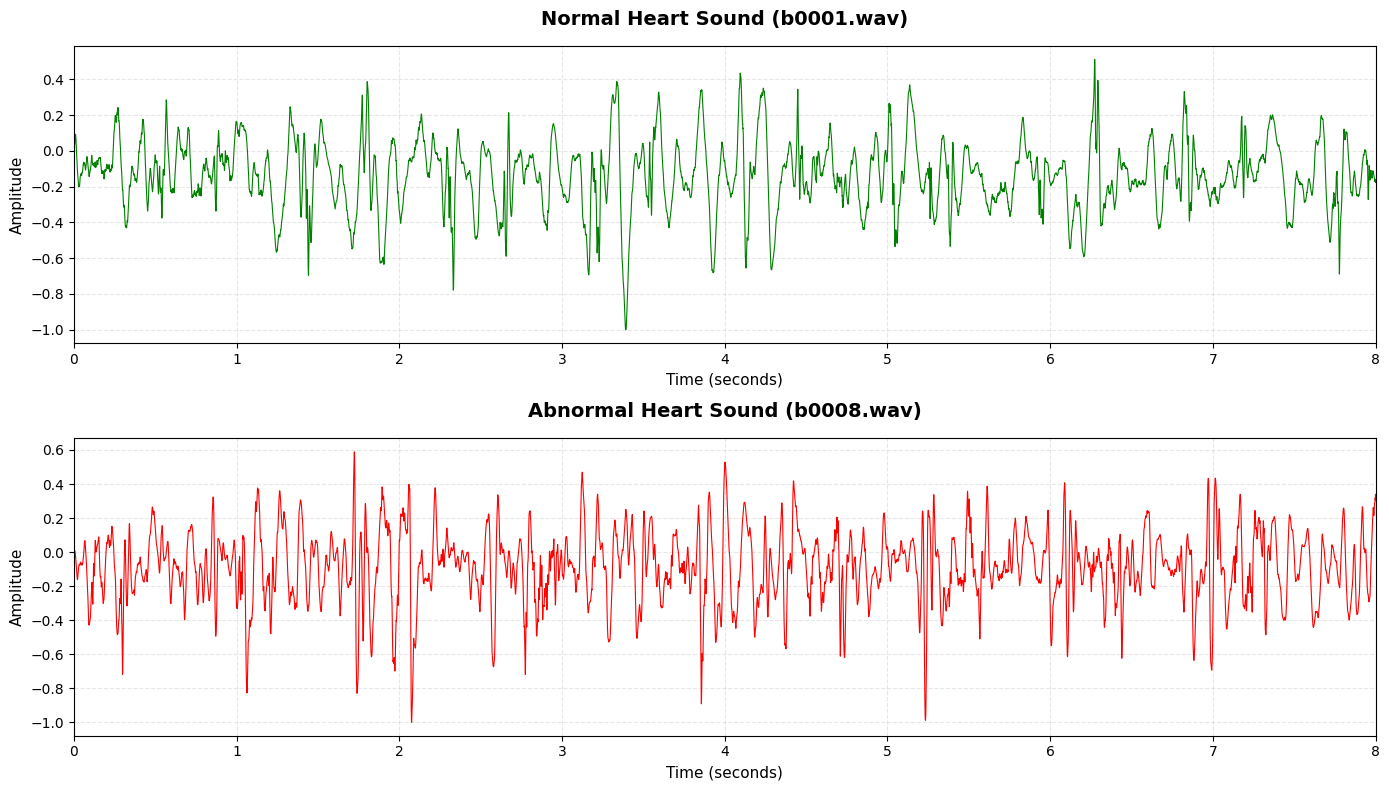


 Audio Statistics:

Normal (b0001.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5113]

Abnormal (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]


In [7]:

normal_path = f'{DATA_FOLDER}/training-b/b0001.wav'
normal_audio, sr = librosa.load(normal_path, sr=2000)

abnormal_path = f'{DATA_FOLDER}/training-b/b0008.wav'
abnormal_audio, sr = librosa.load(abnormal_path, sr=2000)

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# plot normal heart sound
axes[0].plot(np.arange(len(normal_audio)) / sr, normal_audio, color='green', linewidth=0.8)

axes[0].set_title('Normal Heart Sound (b0001.wav)', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Time (seconds)', fontsize=11)
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, len(normal_audio) / sr)

# plot abnormal heart sound
axes[1].plot(np.arange(len(abnormal_audio)) / sr, abnormal_audio, color='red', linewidth=0.8)
axes[1].set_title('Abnormal Heart Sound (b0008.wav)', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Time (seconds)', fontsize=11)
axes[1].set_ylabel('Amplitude', fontsize=11)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, len(abnormal_audio) / sr)

plt.tight_layout()
plt.show()

# print audio statistics
print(f"\n Audio Statistics:")
print(f"\nNormal (b0001.wav):")
print(f"  • Duration: {len(normal_audio) / sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(normal_audio)}")
print(f"  • Amplitude Range: [{normal_audio.min():.4f}, {normal_audio.max():.4f}]")

print(f"\nAbnormal (b0008.wav):")
print(f"  • Duration: {len(abnormal_audio) / sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(abnormal_audio)}")
print(f"  • Amplitude Range: [{abnormal_audio.min():.4f}, {abnormal_audio.max():.4f}]")

Defining audio augmentation functions such as time stretch, pitch stretch and adding noise to audio; in order to create variations of abnormal class samples

In [8]:
def time_stretch_audio(audio, rate):
  """
  Speed up or slow down audio

  Args:
    audio: numpy array - the input audio waveform
    rate: float - speed multiplier
      - rate > 1.0 - audio plays FASTER (compressed)
      - rate < 1.0 - audio plays SLOWER (stretched)
      - rate = 1.0 - audio plays with NORMAL SPEED
      - Example: rate=1.1 means audio will play 10% faster, rate=0.9 means audio will play 10% slower

  Returns:
    numpy array - time-streched audio waveform

  """
  return librosa.effects.time_stretch(y=audio, rate=rate)

def pitch_stretch_audio(audio, sr, n_steps):
  """
  Shift pitch up or down

  Args:
    audio: numpy array - the input audio waveform
    sr: int - sample rate (Hz)
    n_steps: int - number of semitones to shift pitch by
      - n_steps > 0 - shift pitch UP (higher frequency)
      - n_steps < 0 - shift pitch DOWN (lower frequency)
      - n_steps = 0 - no pitch shift
      - Example: n_steps=2 shifts up 2 semitones, n_steps=-2 shifts down 2 semitones

  Returns:
    numpy array - pitch-shifted audio waveform

  """
  return librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=n_steps)

def add_noise_audio(audio, noise_factor):
  """
  Add noise to audio

  Args:
        audio: numpy array - the input audio waveform
        noise_factor: float - amount of noise to add (standard deviation)
                      - 0.005 = 0.5% noise (subtle)
                      - 0.01 = 1% noise (moderate)
                      - Higher values = more noise (fuzzier sound)
                      - Lower values = less noise (cleaner sound)

    Returns:
        numpy array - audio with added Gaussian noise
  """
  noise = np.random.randn(len(audio))
  return audio + noise_factor * noise


Augmentating the original audio to be 10% faster

TIME STRETCH FAST (rate=1.1)


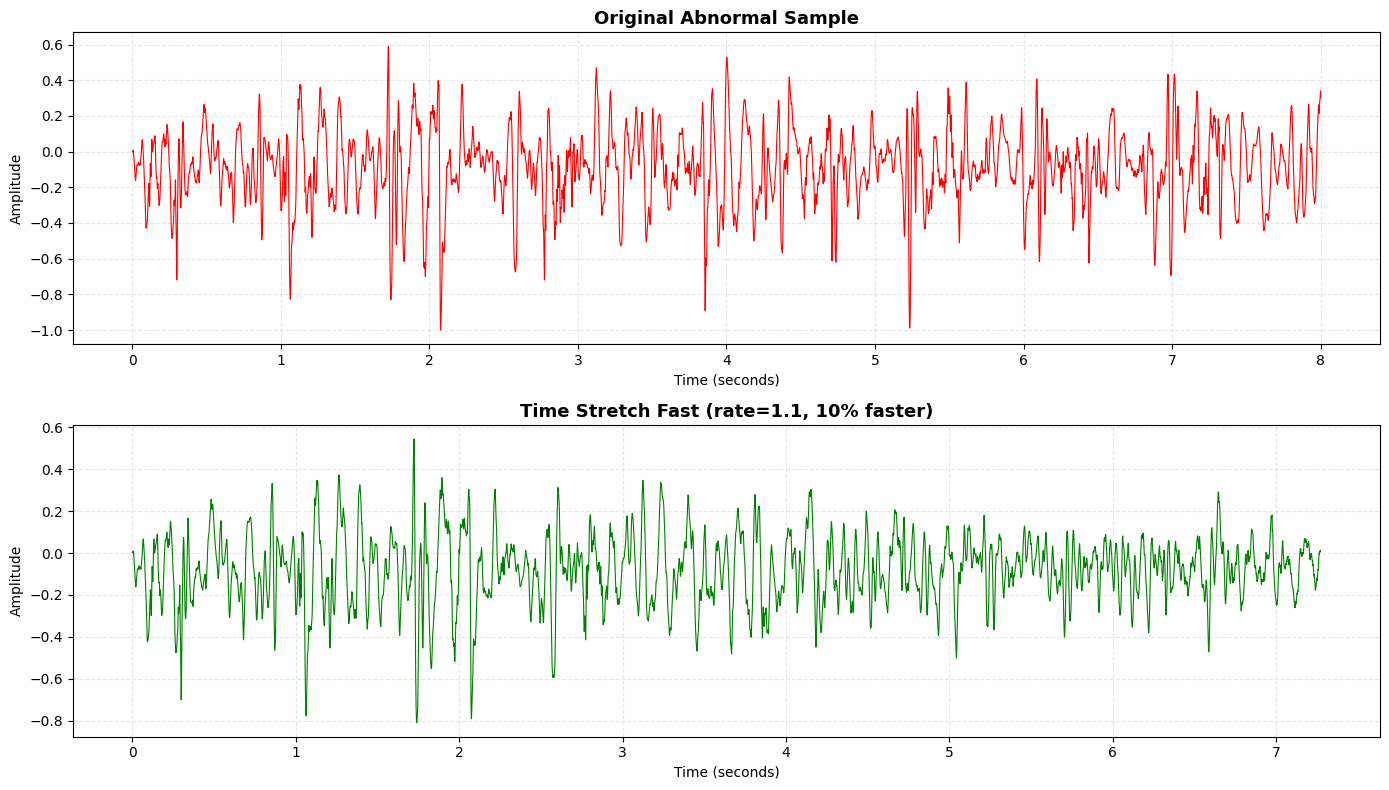


Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Time Stretched Fast (rate=1.1):
  • Duration: 7.27 seconds
  • Sample Rate: 2000 Hz
  • Samples: 14545
  • Amplitude Range: [-0.8080, 0.5434]

As we notice, the duration of the augmentated audio is shorter and the number of samples has also reduced


In [9]:


print("=" * 70)
print("TIME STRETCH FAST (rate=1.1)")
print("=" * 70)

original = abnormal_audio

aug_time_fast = time_stretch_audio(original, rate=1.1)

time_original = np.arange(len(original)) / sr
time_fast = np.arange(len(aug_time_fast)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
# axes[0].set_xlim(0, 8)
# axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: Time Stretch Fast
axes[1].plot(time_fast, aug_time_fast, color='green', linewidth=0.8)
axes[1].set_title('Time Stretch Fast (rate=1.1, 10% faster)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
# axes[1].set_xlim(0, 8)
# axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()


print("\nAudio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nTime Stretched Fast (rate=1.1):")
print(f"  • Duration: {len(aug_time_fast)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_time_fast)}")
print(f"  • Amplitude Range: [{aug_time_fast.min():.4f}, {aug_time_fast.max():.4f}]")

print("\nAs we notice, the duration of the augmentated audio is shorter and the number of samples has also reduced")

Augmentating the original audio to be 10% slower

TIME STRETCH SLOW (rate=0.9)


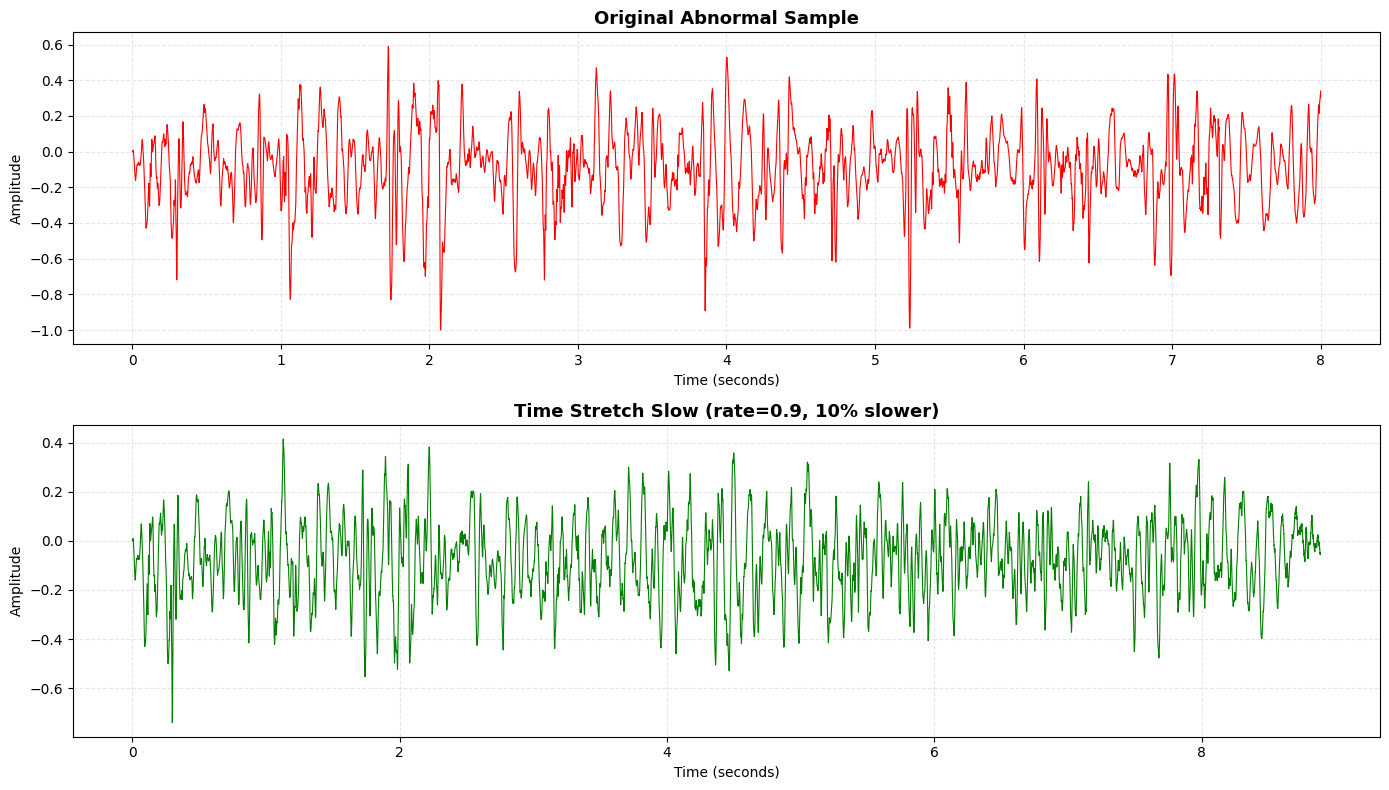


Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Time Stretched Slow (rate=0.9):
  • Duration: 8.89 seconds
  • Sample Rate: 2000 Hz
  • Samples: 17778
  • Amplitude Range: [-0.7401, 0.4144]

As we notice, the duration of the augmentated audio is longer and the number of samples has also increased


In [10]:

print("=" * 70)
print("TIME STRETCH SLOW (rate=0.9)")
print("=" * 70)

original = abnormal_audio

# Apply time stretch slow
aug_time_slow = time_stretch_audio(original, rate=0.9)

# Create time axes
time_original = np.arange(len(original)) / sr
time_slow = np.arange(len(aug_time_slow)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
# axes[0].set_xlim(0, 10)  # Extended to 10s to show the longer slow version
# axes[0].set_xticks([0, 2, 4, 6, 8, 10])

# Plot 2: Time Stretch Slow
axes[1].plot(time_slow, aug_time_slow, color='green', linewidth=0.8)
axes[1].set_title('Time Stretch Slow (rate=0.9, 10% slower)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
# axes[1].set_xlim(0, 10)  # Extended to 10s to show full slow version
# axes[1].set_xticks([0, 2, 4, 6, 8, 10])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nAudio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nTime Stretched Slow (rate=0.9):")
print(f"  • Duration: {len(aug_time_slow)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_time_slow)}")
print(f"  • Amplitude Range: [{aug_time_slow.min():.4f}, {aug_time_slow.max():.4f}]")

print("\nAs we notice, the duration of the augmentated audio is longer and the number of samples has also increased")


Augmenting the audio to shift up in pitch by 2 semitones

PITCH SHIFT UP (n_steps=+2)


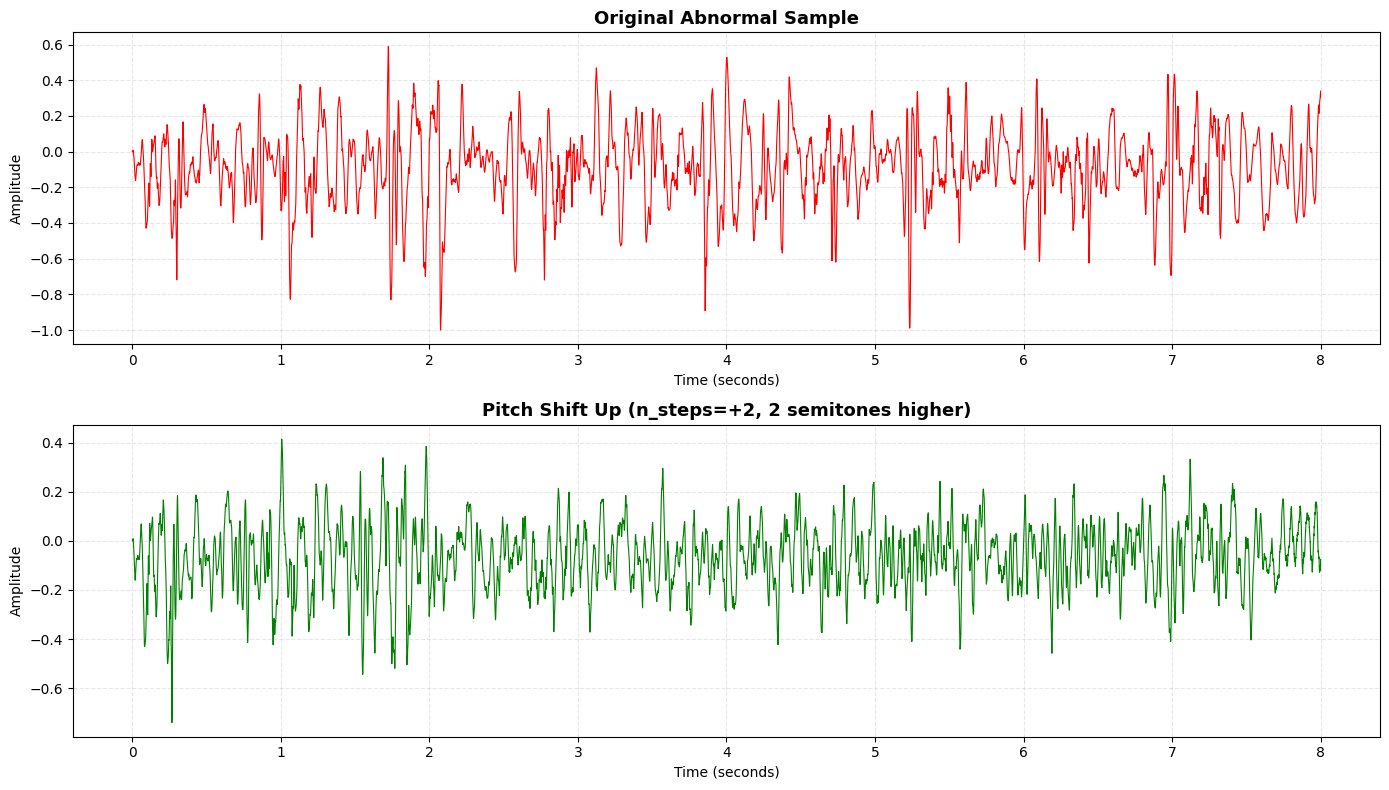


 Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Pitch Shifted Up (n_steps=+2):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-0.7401, 0.4150]


In [11]:
# Testing Pitch Shift UP

print("=" * 70)
print("PITCH SHIFT UP (n_steps=+2)")
print("=" * 70)

original = abnormal_audio

# Apply pitch shift up
aug_pitch_up = pitch_stretch_audio(original, sr, n_steps=2)

# Create time axes
time_original = np.arange(len(original)) / sr
time_pitch_up = np.arange(len(aug_pitch_up)) / sr


fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
# axes[0].set_xlim(0, 8)
# axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: Pitch Shift Up
axes[1].plot(time_pitch_up, aug_pitch_up, color='green', linewidth=0.8)
axes[1].set_title('Pitch Shift Up (n_steps=+2, 2 semitones higher)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
# axes[1].set_xlim(0, 8)
# axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n Audio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nPitch Shifted Up (n_steps=+2):")
print(f"  • Duration: {len(aug_pitch_up)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_pitch_up)}")
print(f"  • Amplitude Range: [{aug_pitch_up.min():.4f}, {aug_pitch_up.max():.4f}]")

## Spectral Centroid Analysis

As it is not visually evident that the frequency of the augmented sound has changed, we can quantify the change in frequency by using spectral centroid analysis.

### What is Spectral Centroid?

* The "center of mass" of the frequency spectrum - the weighted average frequency
* Formula: `Σ(frequency × magnitude) / Σ(magnitude)`
* Higher centroid = "brighter" sound (more high-frequency content)
* Lower centroid = "darker" sound (more low-frequency content)

### Expected for ±2 Semitone Shift

* Centroid should change by approximately **10-15%** in the direction of the pitch shift

In [12]:


centroid_original = librosa.feature.spectral_centroid(y=original, sr=sr)

centroid_pitch_up = librosa.feature.spectral_centroid(y=aug_pitch_up, sr=sr)

# Take mean across time
mean_centroid_original = np.mean(centroid_original)
mean_centroid_pitch_up = np.mean(centroid_pitch_up)

print(f"\n Spectral Centroid Analysis:")
print(f"  • Original spectral centroid: {mean_centroid_original:.2f} Hz")
print(f"  • Pitch shifted spectral centroid: {mean_centroid_pitch_up:.2f} Hz")
print(f"  • Frequency shift: {mean_centroid_pitch_up - mean_centroid_original:.2f} Hz")
print(f"  • Percentage increase: {((mean_centroid_pitch_up/mean_centroid_original - 1) * 100):.1f}%")


 Spectral Centroid Analysis:
  • Original spectral centroid: 38.09 Hz
  • Pitch shifted spectral centroid: 42.46 Hz
  • Frequency shift: 4.37 Hz
  • Percentage increase: 11.5%


Augmenting the audio to shift down in pitch by 2 semitones

PITCH SHIFT DOWN (n_steps=-2)


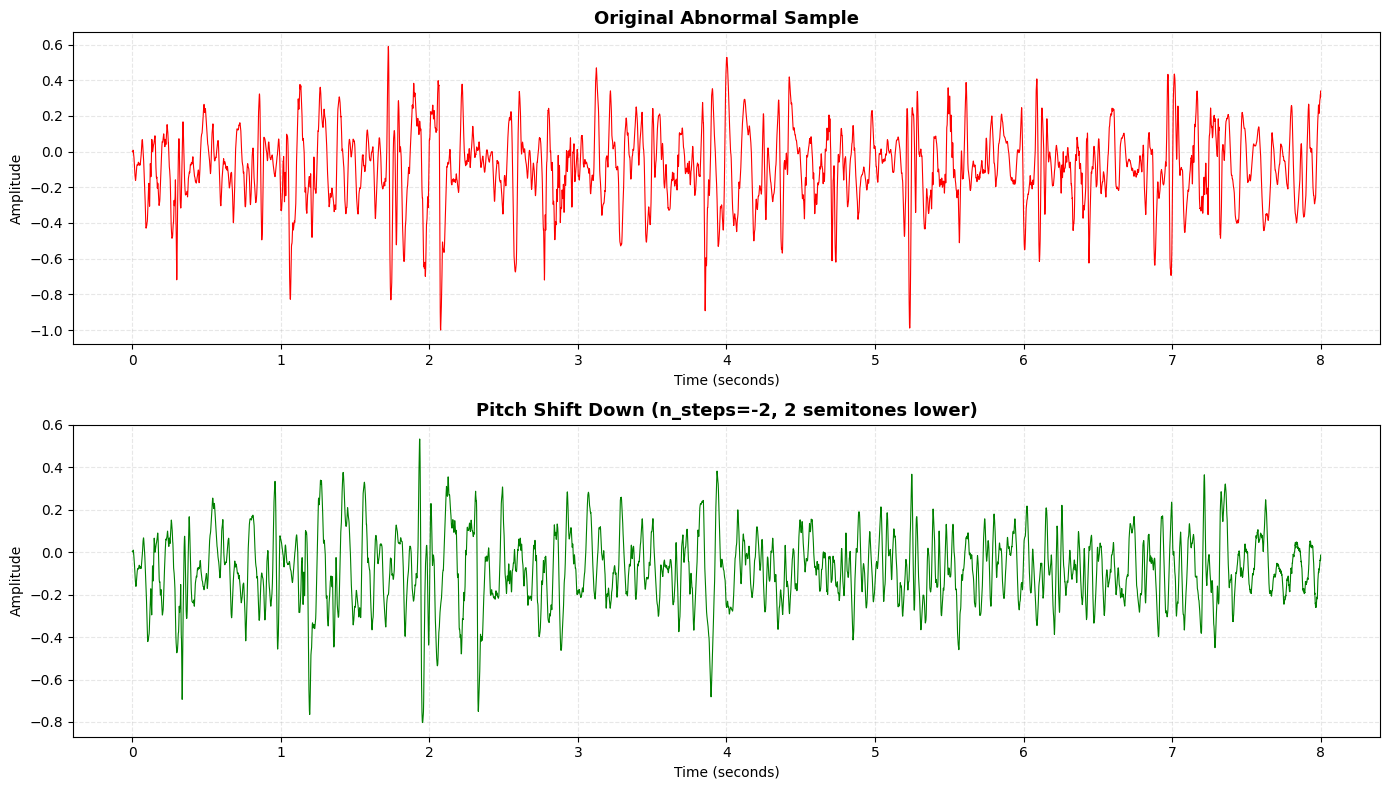


Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Pitch Shifted Down (n_steps=-2):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-0.8028, 0.5332]


In [13]:


print("=" * 70)
print("PITCH SHIFT DOWN (n_steps=-2)")
print("=" * 70)

original = abnormal_audio

aug_pitch_down = pitch_stretch_audio(original, sr, n_steps=-2)

# Create time axes
time_original = np.arange(len(original)) / sr
time_pitch_down = np.arange(len(aug_pitch_down)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
# axes[0].set_xlim(0, 8)
# axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: Pitch Shift Down
axes[1].plot(time_pitch_down, aug_pitch_down, color='green', linewidth=0.8)
axes[1].set_title('Pitch Shift Down (n_steps=-2, 2 semitones lower)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
# axes[1].set_xlim(0, 8)
# axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nAudio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nPitch Shifted Down (n_steps=-2):")
print(f"  • Duration: {len(aug_pitch_down)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_pitch_down)}")
print(f"  • Amplitude Range: [{aug_pitch_down.min():.4f}, {aug_pitch_down.max():.4f}]")


In [14]:
centroid_original = librosa.feature.spectral_centroid(y=original, sr=sr)
centroid_pitch_down = librosa.feature.spectral_centroid(y=aug_pitch_down, sr=sr)

mean_centroid_original = np.mean(centroid_original)
mean_centroid_pitch_down = np.mean(centroid_pitch_down)

print(f"\n Spectral Centroid Analysis:")
print(f"  • Original spectral centroid: {mean_centroid_original:.2f} Hz")
print(f"  • Pitch shifted down spectral centroid: {mean_centroid_pitch_down:.2f} Hz")
print(f"  • Frequency shift: {mean_centroid_pitch_down - mean_centroid_original:.2f} Hz")
print(f"  • Percentage decrease: {((mean_centroid_pitch_down/mean_centroid_original - 1) * 100):.1f}%")


 Spectral Centroid Analysis:
  • Original spectral centroid: 38.09 Hz
  • Pitch shifted down spectral centroid: 31.25 Hz
  • Frequency shift: -6.84 Hz
  • Percentage decrease: -18.0%


For clearer visibility we can capture the first 2 seconds rather than all 8 seconds

ZOOMED COMPARISON: PITCH SHIFT VISUALIZATION


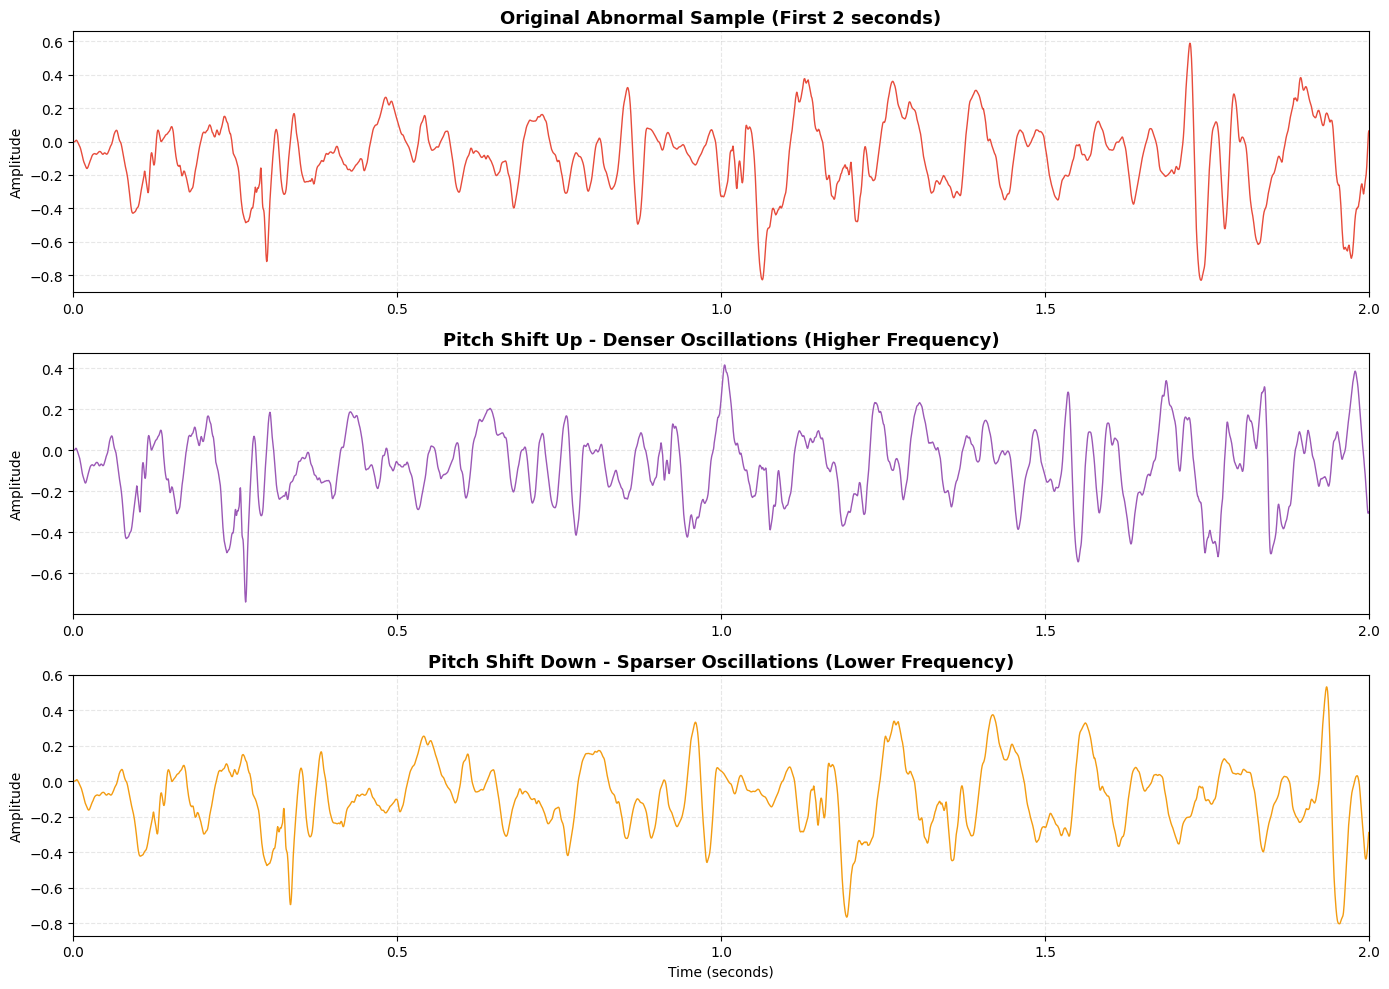


 Visual Observation:
  • Original: Baseline oscillation pattern
  • Pitch Up: More waves packed into same time (denser/tighter)
  • Pitch Down: Fewer waves in same time (sparser/wider)
  • All three maintain same heartbeat timing and structure


In [15]:

print("=" * 70)
print("ZOOMED COMPARISON: PITCH SHIFT VISUALIZATION")
print("=" * 70)

# use 2-second window for detailed view
zoom_duration = 2
zoom_samples = zoom_duration * sr

# extract zoomed portions
original_zoom = original[:zoom_samples]
pitch_up_zoom = aug_pitch_up[:zoom_samples]
pitch_down_zoom = aug_pitch_down[:zoom_samples]

# create time axis
time_zoom = np.arange(zoom_samples) / sr

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Plot 1: Original
axes[0].plot(time_zoom, original_zoom, color='#e74c3c', linewidth=1.0)
axes[0].set_title('Original Abnormal Sample (First 2 seconds)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, zoom_duration)
axes[0].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

# Plot 2: Pitch Up
axes[1].plot(time_zoom, pitch_up_zoom, color='#9b59b6', linewidth=1.0)
axes[1].set_title('Pitch Shift Up - Denser Oscillations (Higher Frequency)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, zoom_duration)
axes[1].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

# Plot 3: Pitch Down
axes[2].plot(time_zoom, pitch_down_zoom, color='#f39c12', linewidth=1.0)
axes[2].set_title('Pitch Shift Down - Sparser Oscillations (Lower Frequency)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Time (seconds)', fontsize=10)
axes[2].set_ylabel('Amplitude', fontsize=10)
axes[2].grid(True, alpha=0.3, linestyle='--')
axes[2].set_xlim(0, zoom_duration)
axes[2].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

plt.tight_layout()
plt.show()

print(f"\n Visual Observation:")
print(f"  • Original: Baseline oscillation pattern")
print(f"  • Pitch Up: More waves packed into same time (denser/tighter)")
print(f"  • Pitch Down: Fewer waves in same time (sparser/wider)")
print(f"  • All three maintain same heartbeat timing and structure")

Augmenting the audio to have Gaussian noise

GAUSSIAN NOISE ADDITION


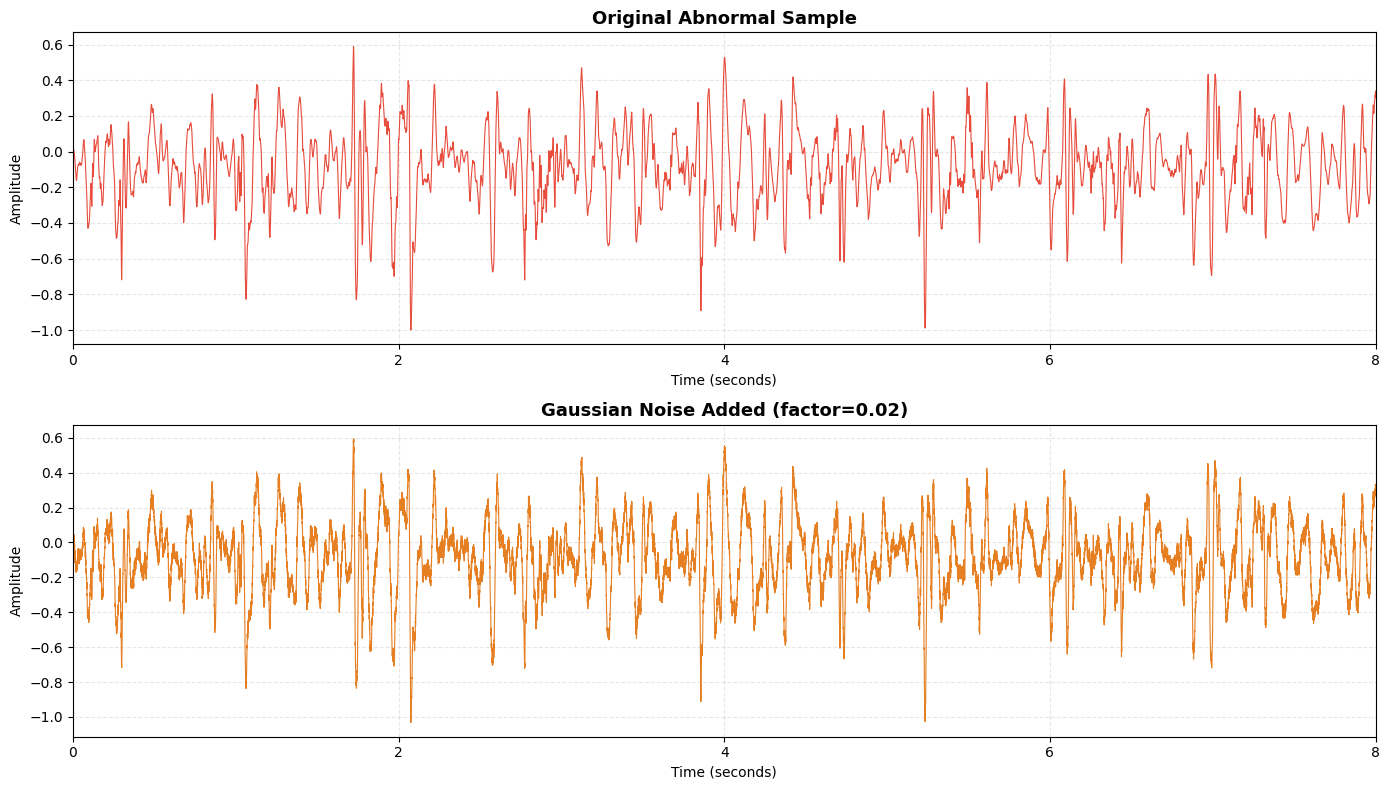


 Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

With Gaussian Noise (factor=0.01):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0323, 0.5928]


In [16]:
print("=" * 70)
print("GAUSSIAN NOISE ADDITION")
print("=" * 70)

original = abnormal_audio

# add Gaussian noise
aug_noise = add_noise_audio(original, noise_factor=0.02)

# create time axes
time_original = np.arange(len(original)) / sr
time_noise = np.arange(len(aug_noise)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='#e74c3c', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 8)
axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: With Noise
axes[1].plot(time_noise, aug_noise, color='#e67e22', linewidth=0.8)
axes[1].set_title('Gaussian Noise Added (factor=0.02)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 8)
axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n Audio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nWith Gaussian Noise (factor=0.01):")
print(f"  • Duration: {len(aug_noise)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_noise)}")
print(f"  • Amplitude Range: [{aug_noise.min():.4f}, {aug_noise.max():.4f}]")



## Signal-to-Noise Ratio (SNR) Analysis

### Why SNR?

Visual inspection shows noise adds "fuzziness," but SNR quantifies the noise level.

### What is SNR?

**SNR = Ratio of signal power to noise power (in decibels)**

Formula: `SNR (dB) = 10 × log₁₀(Signal Power / Noise Power)`

Where:
  - Signal Power = Mean of squared original audio values
  - Noise Power = Mean of squared noise values (difference between noisy and original)
  - dB = Decibels (logarithmic scale)

### Expected Result

For **noise factor = 0.02**: SNR should be ~**20-25 dB**

This indicates appropriate augmentation - enough variation without destroying the heartbeat structure.

In [17]:


# calculate signal power
signal_power = np.mean(original ** 2)

# calculate noise (difference between noisy and original)
noise = aug_noise - original
noise_power = np.mean(noise ** 2)

# convert SNR to decibels
snr_db = 10 * np.log10(signal_power / noise_power)

print(f"\n Signal-to-Noise Ratio (SNR):")
print(f"  • Signal power: {signal_power:.6f}")
print(f"  • Noise power: {noise_power:.6f}")
print(f"  • SNR: {snr_db:.2f} dB")

print(f"\n SNR Interpretation:")
if snr_db > 25:
    print(f"  • Very clean signal - minimal noise added")
elif snr_db > 15:
    print(f"  • Good balance - noticeable noise but signal preserved ")
elif snr_db > 10:
    print(f"  • Moderate noise - signal still recognizable")
else:
    print(f"  • Heavy noise - signal may be degraded ")



 Signal-to-Noise Ratio (SNR):
  • Signal power: 0.050299
  • Noise power: 0.000397
  • SNR: 21.03 dB

 SNR Interpretation:
  • Good balance - noticeable noise but signal preserved 


For clearer visibility we can capture the first 2 seconds rather than all 8 seconds

ZOOMED COMPARISON: GAUSSIAN NOISE VISUALIZATION


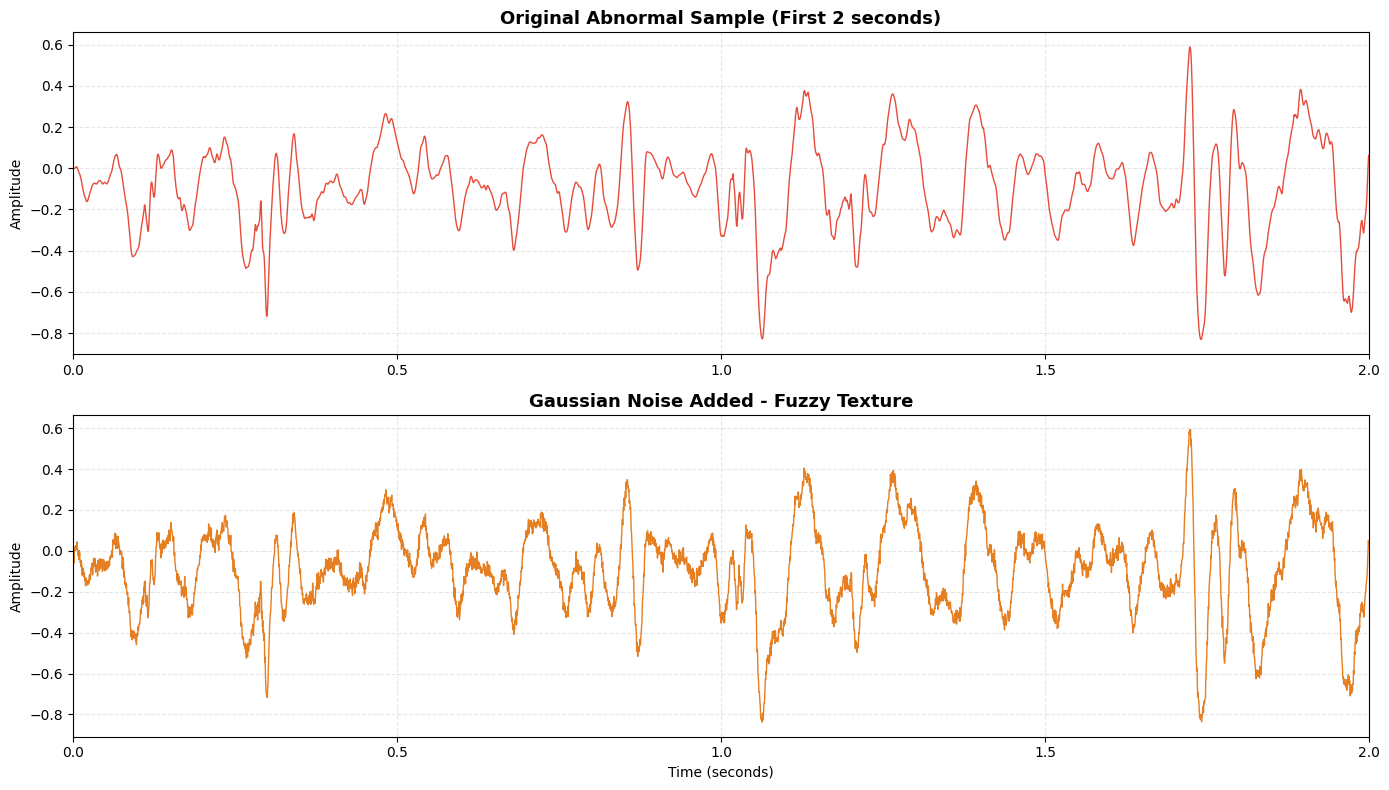


 Visual Observation:
  • Original: Relatively smooth waveform
  • With Noise: Added 'fuzziness' throughout
  • Heartbeat structure preserved, but with random variations


In [18]:

print("=" * 70)
print("ZOOMED COMPARISON: GAUSSIAN NOISE VISUALIZATION")
print("=" * 70)

# Use 2-second window for detailed view
zoom_duration = 2
zoom_samples = zoom_duration * sr

# extract zoomed portions
original_zoom = original[:zoom_samples]
noise_zoom = aug_noise[:zoom_samples]

# create time axis
time_zoom = np.arange(zoom_samples) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_zoom, original_zoom, color='#e74c3c', linewidth=1.0)
axes[0].set_title('Original Abnormal Sample (First 2 seconds)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, zoom_duration)
axes[0].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

# Plot 2: With Noise
axes[1].plot(time_zoom, noise_zoom, color='#e67e22', linewidth=1.0)
axes[1].set_title('Gaussian Noise Added - Fuzzy Texture', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, zoom_duration)
axes[1].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

plt.tight_layout()
plt.show()

print(f"\n Visual Observation:")
print(f"  • Original: Relatively smooth waveform")
print(f"  • With Noise: Added 'fuzziness' throughout")
print(f"  • Heartbeat structure preserved, but with random variations")


In [19]:
!pip install soundfile


In [20]:
import soundfile as sf
print(f"soundfile version: {sf.__version__}")

soundfile version: 0.13.1


Combining training sets B and E into one training set

In [21]:
import shutil

df_combined = pd.concat([df_b, df_e], ignore_index=True)

print(f"\n Dataset Summary:")
print(f"  • Training-B: {len(df_b)} files")
print(f"  • Training-E: {len(df_e)} files")
print(f"  • Combined Total: {len(df_combined)} files")
print(f"  • Normal: {(df_combined['label'] == -1).sum()}")
print(f"  • Abnormal: {(df_combined['label'] == 1).sum()}")

combined_dir = f'{DATA_FOLDER}/training-b-e-combined'
os.makedirs(combined_dir, exist_ok=True)


 Dataset Summary:
  • Training-B: 490 files
  • Training-E: 2141 files
  • Combined Total: 2631 files
  • Normal: 2344
  • Abnormal: 287


Copy all files from original to combined directory

In [22]:
print(f"\n Copying files to combined directory...")

copied_count = 0

print(f"Total files to copy: {len(df_combined)}")
print(f"Starting loop...")

for idx, row in df_combined.iterrows():
    filename = row['filename']

    # Determine source folder based on filename prefix
    if filename.startswith('b'):
        source_path = f'{DATA_FOLDER}/training-b/{filename}.wav'
    elif filename.startswith('e'):
        source_path = f'{DATA_FOLDER}/training-e/{filename}.wav'
    else:
        print(f" Warning: Unknown prefix for {filename}")
        continue

    # Destination path
    dest_path = f'{combined_dir}/{filename}.wav'

    # Copy file if file does not already exist
    if not os.path.exists(dest_path):
      shutil.copy2(source_path, dest_path)
      copied_count += 1
    else:
      continue

    # Progress indicator (every 500 files)
    if copied_count % 500 == 0:
        print(f"  Copied {copied_count}/{len(df_combined)} files...")

print(f" Copied {copied_count} files successfully")


 Copying files to combined directory...
Total files to copy: 2631
Starting loop...
 Copied 0 files successfully


Saving class labels to REFERENCE.CSV

In [23]:
print(f"\n Saving REFERENCE.csv...")
df_combined.to_csv(f'{combined_dir}/REFERENCE.csv', index=False, header=False)
print(f"REFERENCE.csv saved with {len(df_combined)} entries")
print(f"\nCombined Dataset Summary:")
print(f"  • Normal: {(df_combined['label'] == -1).sum()}")
print(f"  • Abnormal: {(df_combined['label'] == 1).sum()}")
print(f"  • Total: {len(df_combined)}")




 Saving REFERENCE.csv...
REFERENCE.csv saved with 2631 entries

Combined Dataset Summary:
  • Normal: 2344
  • Abnormal: 287
  • Total: 2631


Applying augmentations to abnormal samples

In [24]:
print(f"\nGenerating augmented versions of abnormal samples...")

augmented_dir = f'{DATA_FOLDER}/training-b-e-augmented'
os.makedirs(augmented_dir, exist_ok=True)

# Check if the augmented directory is empty
if os.path.exists(augmented_dir) and len(os.listdir(augmented_dir)) > 0:
    print(f"Augmented directory '{augmented_dir}' is not empty. Skipping augmentation.")
else:
    print(f"Augmented directory '{augmented_dir}' is empty or does not exist. Proceeding with augmentation.")

    # get all abnormal samples
    abnormal_samples = df_combined[df_combined['label'] == 1]
    print(f"  • Abnormal samples to augment: {len(abnormal_samples)}")

    augmented_count = 0

    for idx, row in abnormal_samples.iterrows():
        filename = row['filename']

        audio_path = f'{combined_dir}/{filename}.wav'
        audio, sr = librosa.load(audio_path, sr=2000)

        augmentations = [
            (time_stretch_audio(audio, rate=1.1), f"{filename}_time_fast"),
            (time_stretch_audio(audio, rate=0.9), f"{filename}_time_slow"),
            (pitch_stretch_audio(audio, sr, n_steps=2), f"{filename}_pitch_up"),
            (pitch_stretch_audio(audio, sr, n_steps=-2), f"{filename}_pitch_down"),
            (add_noise_audio(audio, noise_factor=0.02), f"{filename}_noisy")
        ]

        for aug_audio, aug_filename in augmentations:
          output_path = f'{augmented_dir}/{aug_filename}.wav'
          # write soundfile as a .wav file
          sf.write(output_path, aug_audio, sr)
          augmented_count += 1

        # print progress every 50 samples
        if ((abnormal_samples.index.get_loc(idx) + 1) % 50) == 0:
            print(f"  Processed {abnormal_samples.index.get_loc(idx) + 1}/{len(abnormal_samples)} abnormal samples ({augmented_count} files generated)...")

    print(f"Generated {augmented_count} augmented files")


Generating augmented versions of abnormal samples...
Augmented directory '/content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/training-b-e-augmented' is not empty. Skipping augmentation.


Verify the number of augmented files

### Expected Output

`287 x 5 = 1435`

As there are 287 abnormal samples and 5 augmentation functions

In [25]:

augmented_dir = f'{DATA_FOLDER}/training-b-e-augmented'
if os.path.exists(augmented_dir):
    augmented_wav_files = [f for f in os.listdir(augmented_dir) if f.endswith('.wav')]
    print(f"Number of .wav files in '{augmented_dir}': {len(augmented_wav_files)}")
else:
    print(f"Directory not found: {augmented_dir}")

Number of .wav files in '/content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/training-b-e-augmented': 1435


Standardise Class Labels for Binary Classification (Normal: 0, Abnormal: 1)

In [26]:
reference_path = f'{combined_dir}/REFERENCE.csv'
print(f"Loading REFERENCE.csv: {reference_path}")

try:
  df_combined = pd.read_csv(reference_path, header=None, names=['filename', 'label'])

  print("\nDataFrame head before updating labels:")
  print(df_combined.head())

  # Map the labels: -1 -> 0 (Normal), 1 remains 1 (Abnormal)
  df_combined['label'] = df_combined['label'].replace({-1: 0})

  print("\nDataFrame head with updated labels:")
  print(df_combined.head())

except FileNotFoundError:
    print(f"ERROR: File not found at {reference_path}")
    print("Please ensure the DATA_FOLDER variable is set correctly and the file exists.")
except Exception as e:
    print(f"An error occurred: {e}")


Loading REFERENCE.csv: /content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/training-b-e-combined/REFERENCE.csv

DataFrame head before updating labels:
  filename  label
0    b0001     -1
1    b0002     -1
2    b0003     -1
3    b0004     -1
4    b0005     -1

DataFrame head with updated labels:
  filename  label
0    b0001      0
1    b0002      0
2    b0003      0
3    b0004      0
4    b0005      0


Splitting the dataset into train,val and test splits using stratified splits to ensure same class proportions

In [27]:
from sklearn.model_selection import train_test_split
if df_combined is not None:
  print("\nSplitting data into Training (80%) and Validation (20%) sets...")
  X = df_combined['filename']
  y = df_combined['label']

  # split the data using stratified split in order to ensures train/val splits have same class proportions as original y (important for imbalanced data)
  X_train_orig, X_val_orig, y_train_orig, y_val_orig = train_test_split(
      X,y,
      test_size=0.2,
      random_state=42,
      stratify=y
  )

  # Create DataFrames for the splits
  # .reset_index(drop=True): Creates a new clean index (0, 1, 2...) for the DataFrame, discarding the old index.
  df_train_orig = pd.DataFrame({'filename': X_train_orig, 'label': y_train_orig}).reset_index(drop=True)
  df_val_orig = pd.DataFrame({'filename': X_val_orig, 'label': y_val_orig}).reset_index(drop=True)
  print(f" Training set size: {len(df_train_orig)}")
  print(f" Validation set size: {len(df_val_orig)}")

  train_x_orig = df_train_orig['filename'].to_list()
  train_y_orig = df_train_orig['label'].to_list()
  val_x_orig = df_val_orig['filename'].to_list()
  val_y_orig = df_val_orig['label'].to_list()

  print("\nTrain Label Distribution (%):")
    # Verify stratification: Proportions should be similar to original (~89% / 11%)
  print(df_train_orig['label'].value_counts(normalize=True) * 100)


  print("\nValidation Label Distribution (%):")
  # Verify stratification: Proportions should be similar to original (~89% / 11%)
  print(df_val_orig['label'].value_counts(normalize=True) * 100)



Splitting data into Training (80%) and Validation (20%) sets...
 Training set size: 2104
 Validation set size: 527

Train Label Distribution (%):
label
0    89.068441
1    10.931559
Name: proportion, dtype: float64

Validation Label Distribution (%):
label
0    89.184061
1    10.815939
Name: proportion, dtype: float64


In [28]:
print(df_train_orig.head())
print(df_val_orig.head())

  filename  label
0   e01004      0
1   e00236      0
2    b0152      0
3   e01664      0
4    b0318      1
  filename  label
0   e01543      0
1   e00268      0
2   e01715      0
3   e02051      0
4   e00290      0


Setting up the test set

In [29]:
print("Loading the Test Set")

TEST_FOLDER = f'{DATA_FOLDER}/validation'
test_reference_path = f'{TEST_FOLDER}/REFERENCE.csv'
print(f"Loading REFERENCE.csv from: {test_reference_path}")

try:

  df_test_orig = pd.read_csv(test_reference_path, header=None, names=['filename', 'label'])

  print("\nDataFrame head before updating labels:")
  print(df_test_orig.head())

  # Map the labels: -1 -> 0 (Normal), 1 remains 1 (Abnormal)
  # This is the same standardization we did for the training data
  df_test_orig['label'] = df_test_orig['label'].replace({-1: 0})

  test_x_orig = df_test_orig['filename'].to_list()
  test_y_orig = df_test_orig['label'].to_list()

  print("\nDataFrame head with updated test labels:")
  print(df_test_orig.head())

  print(f"\nTest set size: {len(df_test_orig)}")

  print("\nTest Label Distribution (%):")
  print(df_test_orig['label'].value_counts(normalize=True) * 100)

except FileNotFoundError:
    print(f"ERROR: File not found at {test_reference_path}")
    print("Please ensure the 'DATA_FOLDER' variable is set correctly.")
except Exception as e:
    print(f"An error occurred: {e}")

Loading the Test Set
Loading REFERENCE.csv from: /content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/validation/REFERENCE.csv

DataFrame head before updating labels:
  filename  label
0    a0001      1
1    a0002      1
2    a0003      1
3    a0004      1
4    a0005      1

DataFrame head with updated test labels:
  filename  label
0    a0001      1
1    a0002      1
2    a0003      1
3    a0004      1
4    a0005      1

Test set size: 301

Test Label Distribution (%):
label
1    50.166113
0    49.833887
Name: proportion, dtype: float64


Loading augmented abnormal samples so that they can be concatenated with the original samples to balance the dataset

In [30]:
import glob
print("Loading pre-augmented abnormal samples into seperate lists...")

AUGMENTED_FOLDER = 'training-b-e-augmented'
aug_folder_path = f'{DATA_FOLDER}/{AUGMENTED_FOLDER}'

train_x_aug = []
train_y_aug = []

# finds all audio files in the training-b-e-augmented folder
if os.path.exists(aug_folder_path):
  file_paths = glob.glob(f'{aug_folder_path}/*.wav')
  print(f"Found {len(file_paths)} augmented samples in: {AUGMENTED_FOLDER}")

  # loops through the files
  for file_path in file_paths:
    # extracts the base name of the file, that is it strips away the entire folder path, leaving only the file name
    base_name = os.path.basename(file_path)
    # splits the filename into two parts: the name and extension
    # we are only interested in the name
    filename_no_ext = os.path.splitext(base_name)[0]

    train_x_aug.append(filename_no_ext)
    # appends 1 to the lables array as all the files in the training-b-e-augmented are abnormal samples
    train_y_aug.append(1)
else:
    print(f"ERROR: Folder not found, skipping: {aug_folder_path}")
    print("Please ensure 'DATA_FOLDER' is set correctly and the augmented folder exists.")

print("\n--- Finished loading augmented samples ---")
print(f"Total augmented 'x' samples (train_x_aug): {len(train_x_aug)}")
print(f"Total augmented 'y' samples (train_y_aug): {len(train_y_aug)}")

Loading pre-augmented abnormal samples into seperate lists...
Found 1435 augmented samples in: training-b-e-augmented

--- Finished loading augmented samples ---
Total augmented 'x' samples (train_x_aug): 1435
Total augmented 'y' samples (train_y_aug): 1435


Combining original and augmented list into one set and re-evaluating class balance

In [31]:
print("Combining original and augmented lists into one set...")

train_x_augmented = train_x_orig + train_x_aug
train_y_augmented = train_y_orig + train_y_aug

print(f"Original training samples (train_x_orig): {len(train_x_orig)}")
print(f"New augmented samples (train_x_aug):     {len(train_x_aug)}")
print(f"Total balanced training samples (train_x_augmented): {len(train_x_augmented)}")

print("\n--- Verifying new 'train_x_augmented' label distribution ---")

df_train_y_aug = pd.DataFrame({'label': train_y_augmented})
print(df_train_y_aug['label'].value_counts(normalize=True) * 100)

Combining original and augmented lists into one set...
Original training samples (train_x_orig): 2104
New augmented samples (train_x_aug):     1435
Total balanced training samples (train_x_augmented): 3539

--- Verifying new 'train_x_augmented' label distribution ---
label
0    52.952812
1    47.047188
Name: proportion, dtype: float64


Defining pre-processing and feature extraction functions

Notice how all the constants and helper functions are defined in one cell. Intially they were in separate cells but joblib wasn't able to get the global constants so wasn't working; hence everything had to be combined into one cell

In [32]:
print("Creating output directories")
base_output_dir = f'{DATA_FOLDER}/processed_data'
os.makedirs(base_output_dir, exist_ok=True)

data_folders = ['train_orig', 'train_aug', 'val_orig', 'test_orig']

for folder_name in data_folders:
  output_path = os.path.join(base_output_dir, folder_name)
  os.makedirs(output_path, exist_ok=True)

print("Directories are ready.")

Creating output directories
Directories are ready.


In [33]:

# helper function to locate the file
def find_full_path(filename, source_folders_list):

  # Append .wav extension
  filename_wav = f"{filename}.wav"

  for folder_path in source_folders_list:
    # Create the full potential path
    full_path = os.path.join(folder_path, filename_wav)
    # Check if this file actually exists
    if os.path.exists(full_path):
      return full_path

  return None

In [34]:
import os
import numpy as np
import warnings
from joblib import Parallel, delayed
import librosa
import traceback
from scipy.signal import butter, filtfilt, find_peaks
from scipy.fftpack import dct
from tqdm.notebook import tqdm


SAMPLE_RATE = 2000
TARGET_DURATION_SEC = 5
TARGET_LENGTH = SAMPLE_RATE * TARGET_DURATION_SEC
LOW_CUT = 25
HIGH_CUT = 400
FILTER_ORDER = 4
N_MELS = 128
N_FFT = 2048
HOP_LENGTH = 512
N_MFCC = 20


def butter_bandpass_filter(data, lowcut, highcut, fs, order=FILTER_ORDER):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

def preprocess_audio(file_path):
    try:
        audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)
        if audio.size == 0:
            print(f"Warning: Audio file {file_path} is empty. Skipping...")
            return None

        filtered_audio = butter_bandpass_filter(audio, LOW_CUT, HIGH_CUT, sr)
        pad_audio = librosa.util.fix_length(filtered_audio, size=TARGET_LENGTH)
        normalised_audio = librosa.util.normalize(pad_audio)

        assert normalised_audio.shape[0] == TARGET_LENGTH
        assert np.max(np.abs(normalised_audio)) <= 1.0 + 1e-6

        return normalised_audio
    except Exception as e:
        print(f"\n--- ERROR IN preprocess_audio ---")
        print(f"File: {file_path}")
        traceback.print_exc()
        print("--------------------------------\n")
        return None

def get_mel_spectrogram(audio):

    if not isinstance(audio, np.ndarray):
        return None
    try:
        S = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS,
                                           n_fft=N_FFT, hop_length=HOP_LENGTH)
        S_db = librosa.power_to_db(S, ref=np.max)
        return S_db
    except Exception as e:
        print(f"\n--- ERROR IN get_mel_spectrogram ---")
        traceback.print_exc()
        print("--------------------------------\n")
        return None

def get_1d_features(audio, use_lfcc=False):

    if not isinstance(audio, np.ndarray):
        return None
    try:

        features = []
        mfccs = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=N_MFCC)
        features.extend(np.mean(mfccs, axis=1))
        features.extend(np.std(mfccs, axis=1))
        features.extend(np.min(mfccs, axis=1))
        features.extend(np.max(mfccs, axis=1))

        # lfccs implementation for experiment 2.1

        if use_lfcc:

          # get magnitude squared of the STFT
          S = np.abs(librosa.stft(audio, n_fft=N_FFT, hop_length=HOP_LENGTH))**2

          # linear filter banks
          n_filters = 20
          low_freq = 0
          high_freq = SAMPLE_RATE / 2
          # create linearly spaced points (in Hz)
          linear_points = np.linspace(low_freq, high_freq, n_filters + 2)
          # convert Hz to FFT bin indices
          bins = np.floor((N_FFT + 1) * linear_points / SAMPLE_RATE)

          # construct filter bank matrix
          fbank = np.zeros((n_filters, int(N_FFT / 2 + 1)))
          for m in range(1, n_filters + 1):
            f_m_minus = int(bins[m-1])
            f_m = int(bins[m])
            f_m_plus = int(bins[m+1])

            for k in range(f_m_minus, f_m):
              fbank[m-1, k] = (k - f_m_minus) / (f_m - f_m_minus)
            for k in range(f_m, f_m_plus):
              fbank[m-1, k] = (f_m_plus - k) / (f_m_plus - f_m)

          # apply filter banks
          S_filtered = np.dot(fbank, S)
          S_log = np.log(S_filtered + 1e-10)

          # dct to get final lfccs
          lfccs = dct(S_log, type=2, axis=0, norm='ortho')

          features.extend(np.mean(lfccs, axis=1))
          features.extend(np.std(lfccs, axis=1))
          features.extend(np.min(lfccs, axis=1))
          features.extend(np.max(lfccs, axis=1))

        zcr = librosa.feature.zero_crossing_rate(audio)[0]
        centroid = librosa.feature.spectral_centroid(y=audio, sr=SAMPLE_RATE)[0]

        features.extend([np.mean(zcr), np.std(zcr), np.min(zcr), np.max(zcr)])
        features.extend([np.mean(centroid), np.std(centroid), np.min(centroid), np.max(centroid)])

        return np.array(features)

    except Exception as e:
        print(f"\n--- ERROR IN get_1d_features ---")
        traceback.print_exc()
        print("--------------------------------\n")
        return None


# segmentation functions

def normalize_signal(signal):
    """
    Min-Max Normalization (0 to 1). Used for Energy Calculation.
    """
    if np.max(np.abs(signal)) == 0: return signal
    return (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

def z_score_normalize(signal):
    """
    Standardize signal to Mean=0, Std=1. Used for Model Input.
    """
    mean = np.mean(signal)
    std = np.std(signal)
    if std < 1e-6: return signal
    return (signal - mean) / std



def get_energy_envelope(audio):
    # 1. Normalize Audio
    norm_audio = audio / (np.max(np.abs(audio)) + 1e-6)
    # 2. Shannon Energy
    energy = norm_audio**2
    energy = -energy * np.log(energy + 1e-12)
    # 3. Smooth & Remove Drift (Bandpass 0.5 - 10 Hz)
    smooth_energy = butter_bandpass_filter(energy, 0.5, 10, SAMPLE_RATE, order=3)
    return normalize_signal(smooth_energy)


def segment_heart_cycles_quantized(audio, sr=2000, debug=False):
    """
    ULTRA-ROBUST CLINICAL SEGMENTATION:
    1. Centered on peaks where possible.
    2. Strictly sequential (no resetting to 0s).
    3. Handles time-fast files by duplicating Ep 2 if Ep 3 doesn't fit.
    """
    try:
        epoch_len = int(2.5 * sr)
        total_required = epoch_len * 3

        # 1. CLINICAL PADDING: If the file is shorter than 7.5s,
        # add silence to the end so we can always get 3 unique windows.
        if len(audio) < total_required:
            padding_needed = total_required - len(audio)
            audio = np.concatenate([audio, np.zeros(padding_needed)])

        # 2. Standard Peak Detection on the padded signal
        norm_audio = audio / (np.max(np.abs(audio)) + 1e-6)
        energy = - (norm_audio**2) * np.log(norm_audio**2 + 1e-12)
        smooth_energy = normalize_signal(butter_bandpass_filter(energy, 0.5, 10, sr))
        peaks, _ = find_peaks(smooth_energy, height=0.05, distance=int(0.20 * sr))

        candidates = []
        last_end_sample = 0

        # 3. Peak-Centered Extraction
        for p in peaks:
            raw_start_sec = (p / float(sr)) - 1.25
            start_sample = int(max(0, round(raw_start_sec, 1)) * sr)
            end_sample = start_sample + epoch_len

            if start_sample >= last_end_sample and end_sample <= len(audio):
                candidates.append((start_sample, end_sample) if debug else audio[start_sample:end_sample])
                last_end_sample = end_sample
            if len(candidates) == 3: break

        # 4. Sequential Fill (Now guaranteed to have enough space)
        while len(candidates) < 3:
            start = last_end_sample
            end = start + epoch_len
            candidates.append((start, end) if debug else audio[start:end])
            last_end_sample = end

        return candidates[:3]
    except Exception:
        return [(0, epoch_len)] * 3


# --- ROBUST V3 PROCESS FUNCTION ---
# We add imports INSIDE the function to ensure worker processes have them
def process_and_return(file_path, pipeline_version='v1'):
    import librosa
    import numpy as np

    try:
        # Load audio
        audio, sr = librosa.load(file_path, sr=2000)

        # --- V1 / V2 Logic ---
        if pipeline_version in ['v1', 'v2']:
            # ... (Your existing V1/V2 code is fine) ...
            use_lfcc = (pipeline_version == 'v2')
            mel_spec = get_mel_spectrogram(audio)
            features = get_1d_features(audio, use_lfcc=use_lfcc)
            if mel_spec is not None and features is not None:
                return (mel_spec, features)
            return None

        # --- V3 Logic ---
        elif pipeline_version == 'v3':
            # CRITICAL: Ensure this function is visible.
            # If segment_heart_cycles isn't defined here, it will crash.
            # (Assuming segment_heart_cycles is defined in a previous cell)

            # 1. Segmentation
            epochs = segment_heart_cycles_quantized(audio, sr=sr, debug=False)

            v3_results = []
            target_samples = int(2.5 * 2000)

            for i, epoch_audio in enumerate(epochs):
                # Safety Check
                if len(epoch_audio) != target_samples:
                    epoch_audio = librosa.util.fix_length(epoch_audio, size=target_samples)

                # Feature Extraction
                epoch_features = get_1d_features(epoch_audio, use_lfcc=True)
                epoch_spec = get_mel_spectrogram(epoch_audio)

                if epoch_features is not None and epoch_spec is not None:
                    v3_results.append((epoch_spec, epoch_features))

            if len(v3_results) == 3:
                return v3_results
            return None

    except Exception as e:
        # PRINT THE ACTUAL ERROR to debug
        print(f"❌ CRASH on {file_path}: {str(e)}")
        import traceback
        traceback.print_exc() # This will show you the exact line number
        return None



def run_preprocessing_job(filenames, labels, source_folders, output_dir_name, pipeline_version='v1', n_jobs=-1, batch_size=20):
    output_data_dir = os.path.join(base_output_dir, output_dir_name)
    os.makedirs(output_data_dir, exist_ok=True)

    # Standardize suffixes for different pipeline versions
    if pipeline_version == 'v1': suffix = ""
    elif pipeline_version == 'v2': suffix = "_lfcc"
    elif pipeline_version == 'v3': suffix = "_segmented"
    else: raise ValueError(f"Unknown version: {pipeline_version}")

    print(f"--- JOB: {output_dir_name} | Version: {pipeline_version.upper()} ---")

    mel_path = os.path.join(output_data_dir, f"{output_dir_name}_mel_specs{suffix}.npy")
    feat_path = os.path.join(output_data_dir, f"{output_dir_name}_1d_features{suffix}.npy")
    lbl_path = os.path.join(output_data_dir, f"{output_dir_name}_labels{suffix}.npy")

    # Early exit if files exist (Delete folders manually to trigger re-run)
    if os.path.exists(mel_path) and os.path.exists(feat_path) and os.path.exists(lbl_path):
        print("Found existing files. Loading from disk....")
        return np.load(mel_path), np.load(feat_path), np.load(lbl_path)

    jobs = [(find_full_path(fname, source_folders), fname, lbl) for fname, lbl in zip(filenames, labels) if find_full_path(fname, source_folders)]

    if not jobs:
        print("No files found."); return None, None, None

    print(f"Processing {len(jobs)} files for {pipeline_version}...")
    tasks = [delayed(process_and_return)(p, pipeline_version) for (p, f, l) in jobs]

    results = Parallel(n_jobs=n_jobs, batch_size=batch_size, prefer="threads")(
        tqdm(tasks, desc=f"{output_dir_name} ({pipeline_version})")
    )

    mel_specs, features, final_labels = [], [], []
    for res, (_, _, original_label) in zip(results, jobs):
        if res is not None:
            # V3 logic: res is a list of 3 (spec, feat) tuples
            if isinstance(res, list):
                for epoch_spec, epoch_features in res:
                    mel_specs.append(epoch_spec)
                    features.append(epoch_features)
                    final_labels.append(original_label)
            else:
                # V1/V2 logic: res is a single (spec, feat) tuple
                mel_specs.append(res[0])
                features.append(res[1])
                final_labels.append(original_label)

    if mel_specs:
        # --- FIX: UNIVERSAL PADDING FOR INHOMOGENEOUS SHAPES ---
        # Ensures all spectrograms are exactly 128 time-steps wide
        standardized_mels = [librosa.util.fix_length(spec, size=128, axis=1) if spec.shape[1] != 128 else spec for spec in mel_specs]

        X_mel = np.array(standardized_mels)
        X_feat = np.array(features)
        y_final = np.array(final_labels)

        print(f"Saving {len(y_final)} samples (Shape: {X_mel.shape}) to {output_data_dir}...")
        np.save(mel_path, X_mel)
        np.save(feat_path, X_feat)
        np.save(lbl_path, y_final)
        return X_mel, X_feat, y_final

    return None, None, None



In [35]:
original_training_folder_list = [f"{DATA_FOLDER}/training-b-e-combined"]
test_folder_list = [f"{DATA_FOLDER}/validation"]
augmented_folder_list = [f"{DATA_FOLDER}/training-b-e-augmented"]

print(f"\n --- PROCESSING V1 DATA ---")
X_train_spec, X_train_1d, y_train_labels = run_preprocessing_job(
    filenames=train_x_orig,
    labels=train_y_orig,
    source_folders=original_training_folder_list,
    output_dir_name='train_orig',
    pipeline_version = 'v1'
)


X_val_spec, X_val_1d, y_val_labels = run_preprocessing_job(
    filenames=val_x_orig,
    labels=val_y_orig,
    source_folders=original_training_folder_list,
    output_dir_name='val_orig',
    pipeline_version = 'v1'
)

X_test_spec, X_test_1d, y_test_labels = run_preprocessing_job(
    filenames=test_x_orig,
    labels=test_y_orig,
    source_folders=test_folder_list,
    output_dir_name='test_orig',
    pipeline_version='v1'
)

X_aug_spec, X_aug_1d, y_aug_labels = run_preprocessing_job(
    filenames=train_x_aug,
    labels=train_y_aug,
    source_folders=augmented_folder_list,
    output_dir_name='train_aug',
    pipeline_version='v1'
)


 --- PROCESSING V1 DATA ---
--- JOB: train_orig | Version: V1 ---
Found existing files. Loading from disk....
--- JOB: val_orig | Version: V1 ---
Found existing files. Loading from disk....
--- JOB: test_orig | Version: V1 ---
Found existing files. Loading from disk....
--- JOB: train_aug | Version: V1 ---
Found existing files. Loading from disk....


In [36]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def plot_confusion_matrix(y_true, y_pred, title):
    """Plots a confusion matrix using Seaborn."""
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Abnormal', 'Normal'],
                yticklabels=['Abnormal', 'Normal'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

processed_data_dir = base_output_dir
train_orig_dir = os.path.join(processed_data_dir, 'train_orig')
val_orig_dir = os.path.join(processed_data_dir, 'val_orig')
train_aug_dir = os.path.join(processed_data_dir, 'train_aug')
test_orig_dir = os.path.join(processed_data_dir, 'test_orig')


print("Loading saved 1D feature arrays...")

# 1. Load Features
X_train_orig = np.load(os.path.join(train_orig_dir, 'train_orig_1d_features.npy'))
X_val_orig   = np.load(os.path.join(val_orig_dir, 'val_orig_1d_features.npy'))
X_train_aug  = np.load(os.path.join(train_aug_dir, 'train_aug_1d_features.npy'))
X_test_orig = np.load(os.path.join(test_orig_dir, 'test_orig_1d_features.npy'))


# 2. Load Labels
y_train_orig = np.load(os.path.join(train_orig_dir, 'train_orig_labels.npy'))
y_val_orig   = np.load(os.path.join(val_orig_dir, 'val_orig_labels.npy'))
y_train_aug  = np.load(os.path.join(train_aug_dir, 'train_aug_labels.npy'))
y_test_orig = np.load(os.path.join(test_orig_dir, 'test_orig_labels.npy'))

print(f"X_train_orig shape: {X_train_orig.shape}")
print(f"X_val_orig shape:   {X_val_orig.shape}")
print(f"X_train_aug shape:  {X_train_aug.shape}")


Loading saved 1D feature arrays...
X_train_orig shape: (2104, 88)
X_val_orig shape:   (527, 88)
X_train_aug shape:  (1435, 88)


--- Starting Experiment 1: Imbalanced SVM ---
Training SVM (Imbalanced Baseline)...
SVM training complete.

--- Validation Results (Imbalanced SVM) ---
              precision    recall  f1-score   support

  Normal (0)       0.97      1.00      0.98       470
Abnormal (1)       1.00      0.74      0.85        57

    accuracy                           0.97       527
   macro avg       0.98      0.87      0.92       527
weighted avg       0.97      0.97      0.97       527

Positive Predictive Value (PPV): 1.0000
Negative Predictive Value (NPV): 0.9691
Area Under Curve (AUC):        0.9791

Imbalanced Validation Confusion Matrix:


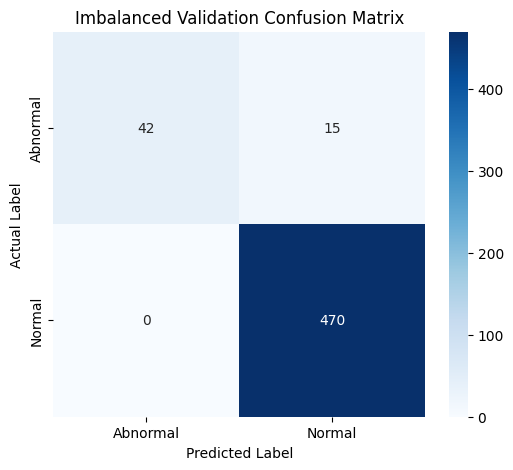

In [37]:
print("--- Starting Experiment 1: Imbalanced SVM ---")

# 1. Scale Data
scaler_imbalanced = StandardScaler()
X_train_imbalanced_scaled = scaler_imbalanced.fit_transform(X_train_orig)
X_val_scaled = scaler_imbalanced.transform(X_val_orig)

# 2. Train SVM (Imbalanced Baseline)
print("Training SVM (Imbalanced Baseline)...")
svm_imbalanced = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_imbalanced.fit(X_train_imbalanced_scaled, y_train_orig)
print("SVM training complete.")

# 3. Predict
y_pred_val_imbalanced = svm_imbalanced.predict(X_val_scaled)
y_prob_val_imbalanced = svm_imbalanced.predict_proba(X_val_scaled)[:, 1]

# 4. Results
print("\n--- Validation Results (Imbalanced SVM) ---")
print(classification_report(y_val_orig, y_pred_val_imbalanced, target_names=['Normal (0)', 'Abnormal (1)']))

# Calculate Metrics
tn, fp, fn, tp = confusion_matrix(y_val_orig, y_pred_val_imbalanced, labels=[0, 1]).ravel()
ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
auc = roc_auc_score(y_val_orig, y_prob_val_imbalanced)

print(f"Positive Predictive Value (PPV): {ppv:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")
print(f"Area Under Curve (AUC):        {auc:.4f}")

print("\nImbalanced Validation Confusion Matrix:")
plot_confusion_matrix(y_val_orig, y_pred_val_imbalanced, title='Imbalanced Validation Confusion Matrix')


--- Starting Experiment 2.1: Balanced SVM ---
Total balanced training samples: 3539
Training SVM (Balanced baseline)...
SVM training complete.

--- Validation Results (Balanced SVM) ---
              precision    recall  f1-score   support

  Normal (0)       1.00      0.96      0.98       470
Abnormal (1)       0.75      0.96      0.85        57

    accuracy                           0.96       527
   macro avg       0.87      0.96      0.91       527
weighted avg       0.97      0.96      0.96       527

Positive Predictive Value (PPV): 0.7534
Negative Predictive Value (NPV): 0.9956
Area Under Curve (AUC):        0.9940

Balanced Validation Confusion Matrix:


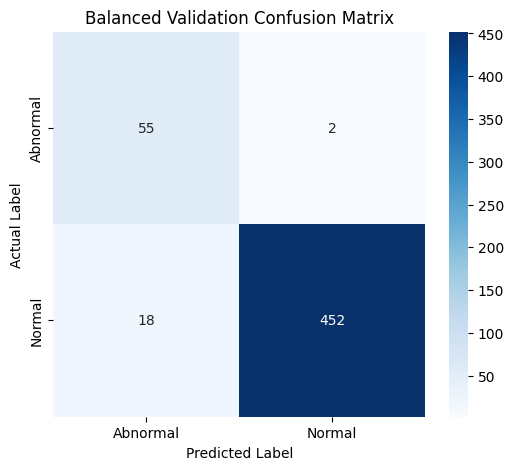

In [38]:
print("\n--- Starting Experiment 2.1: Balanced SVM ---")

# 1. Vertically Stack Data (Original + Augmented)
X_train_balanced = np.vstack((X_train_orig, X_train_aug))
y_train_balanced = np.concatenate((y_train_orig, y_train_aug))

print(f"Total balanced training samples: {X_train_balanced.shape[0]}")

# 2. Scale Data (Fit on the NEW balanced set)
scaler_balanced = StandardScaler()
X_train_balanced_scaled = scaler_balanced.fit_transform(X_train_balanced)
# Important: Transform validation set using the NEW scaler statistics
X_val_balanced_scaled = scaler_balanced.transform(X_val_orig)

# 3. Train SVM
print("Training SVM (Balanced baseline)...")
svm_balanced = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_balanced.fit(X_train_balanced_scaled, y_train_balanced)
print("SVM training complete.")

# 4. Predict
y_pred_val_balanced = svm_balanced.predict(X_val_balanced_scaled)
y_prob_val_balanced = svm_balanced.predict_proba(X_val_balanced_scaled)[:, 1]

# 5. Results
print("\n--- Validation Results (Balanced SVM) ---")
print(classification_report(y_val_orig, y_pred_val_balanced, target_names=['Normal (0)', 'Abnormal (1)']))

tn, fp, fn, tp = confusion_matrix(y_val_orig, y_pred_val_balanced, labels=[0, 1]).ravel()
ppv_bal = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_bal = tn / (tn + fn) if (tn + fn) > 0 else 0
auc_bal = roc_auc_score(y_val_orig, y_prob_val_balanced)

print(f"Positive Predictive Value (PPV): {ppv_bal:.4f}")
print(f"Negative Predictive Value (NPV): {npv_bal:.4f}")
print(f"Area Under Curve (AUC):        {auc_bal:.4f}")

print("\nBalanced Validation Confusion Matrix:")
plot_confusion_matrix(y_val_orig, y_pred_val_balanced, title='Balanced Validation Confusion Matrix')

In [39]:
print(f"\n --- PROCESSING V2 DATA (With LFCCs) ---")

_, X_train_v2, y_train_v2 = run_preprocessing_job(
    filenames=train_x_orig,
    labels=train_y_orig,
    source_folders=original_training_folder_list,
    output_dir_name='train_orig',
    pipeline_version='v2'
)

_, X_val_v2, y_val_v2 = run_preprocessing_job(
    filenames=val_x_orig,
    labels=val_y_orig,
    source_folders=original_training_folder_list,
    output_dir_name='val_orig',
    pipeline_version='v2'
)

_, X_test_v2, y_test_v2 = run_preprocessing_job(
    filenames=test_x_orig,
    labels=test_y_orig,
    source_folders=test_folder_list,
    output_dir_name='test_orig',
    pipeline_version='v2'
)

_, X_aug_v2, y_aug_v2 = run_preprocessing_job(
    filenames=train_x_aug,
    labels=train_y_aug,
    source_folders=augmented_folder_list,
    output_dir_name='train_aug',
    pipeline_version='v2'
)

if X_train_v2 is not None:
    print(f"\nV2 Shape Check: {X_train_v2.shape}")
    if X_train_v2.shape[1] > 100:
        print(f"Success! Feature count is {X_train_v2.shape[1]} (MFCC + LFCC confirmed).")
    else:
        print("Warning: Feature count seems low for V2.")


 --- PROCESSING V2 DATA (With LFCCs) ---
--- JOB: train_orig | Version: V2 ---
Found existing files. Loading from disk....
--- JOB: val_orig | Version: V2 ---
Found existing files. Loading from disk....
--- JOB: test_orig | Version: V2 ---
Found existing files. Loading from disk....
--- JOB: train_aug | Version: V2 ---
Found existing files. Loading from disk....

V2 Shape Check: (2104, 168)
Success! Feature count is 168 (MFCC + LFCC confirmed).


In [40]:
print("Loading saved V2 Features (MFCC + LFCC)...")

X_train_v2 = np.load(os.path.join(train_orig_dir, 'train_orig_1d_features_lfcc.npy'))
X_val_v2   = np.load(os.path.join(val_orig_dir, 'val_orig_1d_features_lfcc.npy'))
X_aug_v2   = np.load(os.path.join(train_aug_dir, 'train_aug_1d_features_lfcc.npy'))
X_test_v2  = np.load(os.path.join(test_orig_dir, 'test_orig_1d_features_lfcc.npy'))

y_train_v2 = np.load(os.path.join(train_orig_dir, 'train_orig_labels_lfcc.npy'))
y_val_v2   = np.load(os.path.join(val_orig_dir, 'val_orig_labels_lfcc.npy'))
y_aug_v2   = np.load(os.path.join(train_aug_dir, 'train_aug_labels_lfcc.npy'))
y_test_v2  = np.load(os.path.join(test_orig_dir, 'test_orig_labels_lfcc.npy'))

print(f"X_train_v2 shape: {X_train_v2.shape}")
print(f"X_val_v2 shape:   {X_val_v2.shape}")
print(f"X_aug_v2 shape:  {X_aug_v2.shape}")
print(f"X_test_v2 shape:  {X_test_v2.shape}")


Loading saved V2 Features (MFCC + LFCC)...
X_train_v2 shape: (2104, 168)
X_val_v2 shape:   (527, 168)
X_aug_v2 shape:  (1435, 168)
X_test_v2 shape:  (301, 168)



--- Starting Experiment 2.2: V2 (MFCC + LFCC) ---
Training on 3539 samples with 168 features.
Training V2 SVM...

 --- V2 Validation Results (MFCC + LFCC) ---
              precision    recall  f1-score   support

  Normal (0)       1.00      0.97      0.98       470
Abnormal (1)       0.79      0.98      0.88        57

    accuracy                           0.97       527
   macro avg       0.89      0.98      0.93       527
weighted avg       0.98      0.97      0.97       527

Precision (PPV): 0.7887
Recall (Sens):   0.9825
AUC Score:       0.9954

Confusion Matrix (V2):


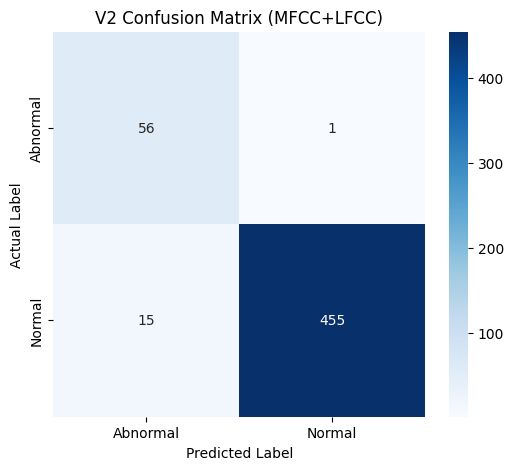

In [41]:
print("\n--- Starting Experiment 2.2: V2 (MFCC + LFCC) ---")

# 1. Stack Data (Original + Augmented)
# Note: We use the '_v2' variables we just generated
X_train_balanced_v2 = np.vstack((X_train_v2, X_aug_v2))
y_train_balanced_v2 = np.concatenate((y_train_v2, y_aug_v2))

print(f"Training on {X_train_balanced_v2.shape[0]} samples with {X_train_balanced_v2.shape[1]} features.")

# 2. Scale Data (CRITICAL: New scaler for V2 features)
scaler_v2 = StandardScaler()
X_train_v2_scaled = scaler_v2.fit_transform(X_train_balanced_v2)
X_val_v2_scaled   = scaler_v2.transform(X_val_v2) # Transform val set too

# 3. Train SVM
print("Training V2 SVM...")
svm_v2 = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_v2.fit(X_train_v2_scaled, y_train_balanced_v2)

# 4. Evaluation
y_pred_val_v2 = svm_v2.predict(X_val_v2_scaled)
y_prob_val_v2 = svm_v2.predict_proba(X_val_v2_scaled)[:, 1]

# 5. Results
print("\n --- V2 Validation Results (MFCC + LFCC) ---")
print(classification_report(y_val_v2, y_pred_val_v2, target_names=['Normal (0)', 'Abnormal (1)']))

# Calculate Metrics
tn, fp, fn, tp = confusion_matrix(y_val_v2, y_pred_val_v2, labels=[0, 1]).ravel()
ppv_v2 = tp / (tp + fp) if (tp + fp) > 0 else 0
auc_v2 = roc_auc_score(y_val_v2, y_prob_val_v2)

print(f"Precision (PPV): {ppv_v2:.4f}")
print(f"Recall (Sens):   {tp/(tp+fn):.4f}")
print(f"AUC Score:       {auc_v2:.4f}")

print("\nConfusion Matrix (V2):")
plot_confusion_matrix(y_val_v2, y_pred_val_v2, title='V2 Confusion Matrix (MFCC+LFCC)')

Detecting Peaks for e01004


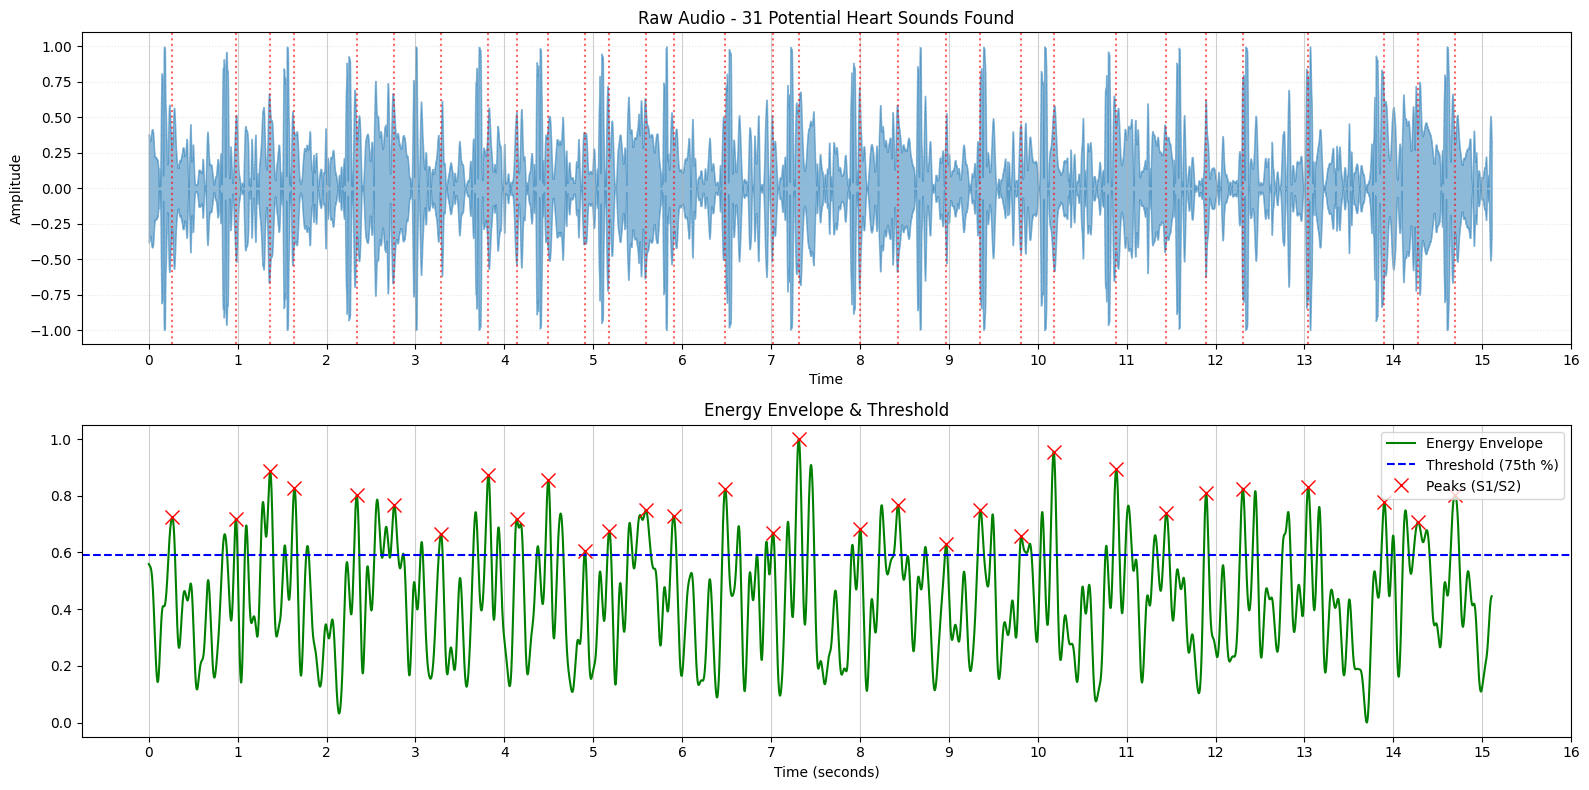

Detecting Peaks for b0471_noisy


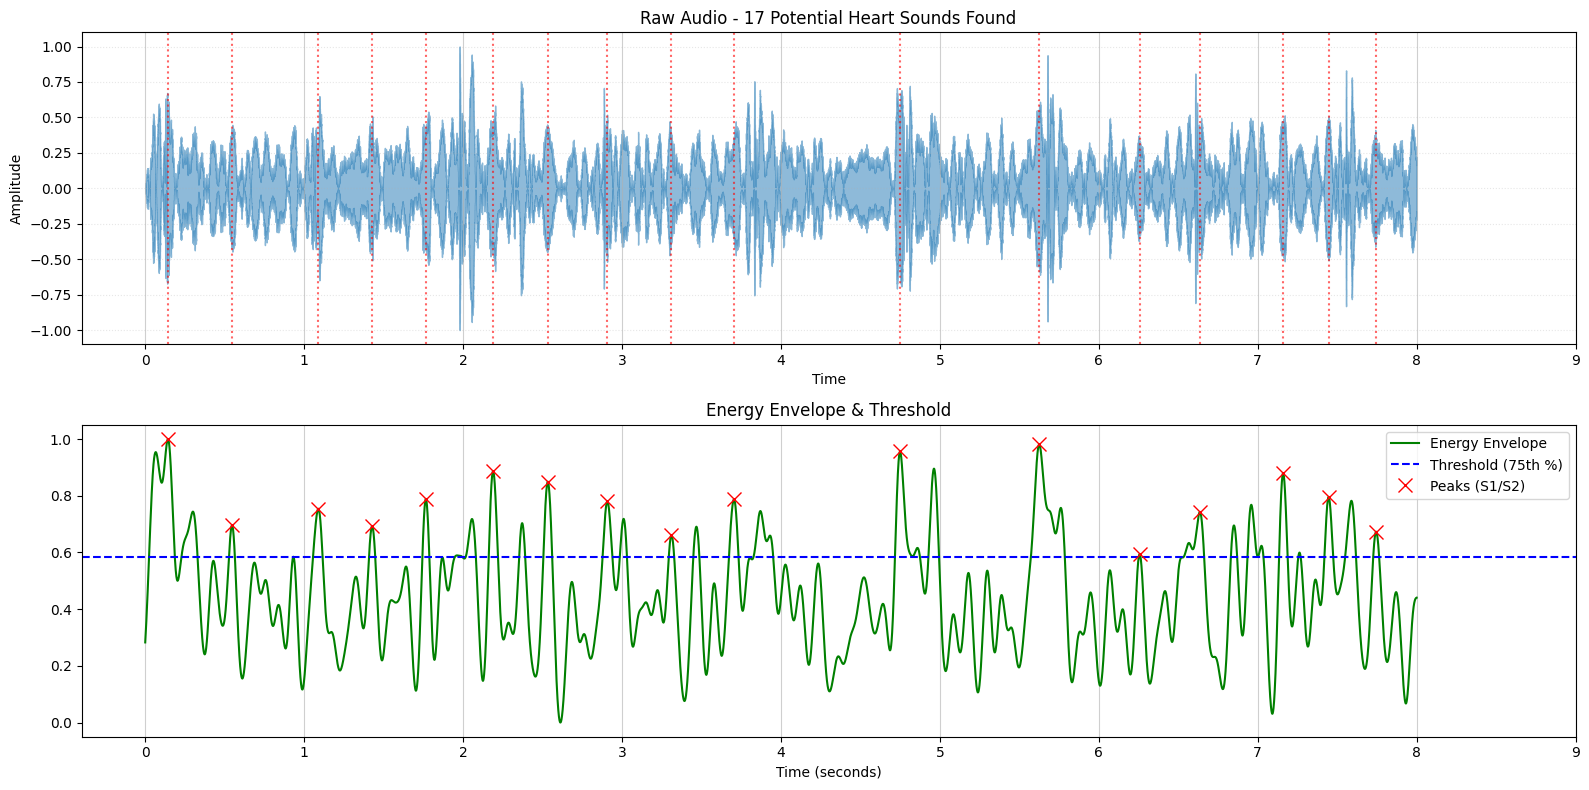

In [42]:

def visualize_peaks(filename, source_folders):
    raw_path = find_full_path(filename, source_folders)
    if not raw_path:
        print(f"File {filename} not found.")
        return

    print(f"Detecting Peaks for {filename}")
    audio, sr = librosa.load(raw_path, sr=SAMPLE_RATE)
    duration = len(audio) / sr

    # A. Get Energy
    energy = get_energy_envelope(audio)

    # B. Find Peaks (Using 75th Percentile)
    threshold = np.percentile(energy, 75)
    threshold = max(threshold, 0.1) # Floor

    distance = int(0.25 * sr) # 250ms min distance
    peaks, _ = find_peaks(energy, height=threshold, distance=distance)

    # C. Plot
    plt.figure(figsize=(16, 8))

    # Top: Raw Signal
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(audio, sr=sr, alpha=0.5)
    plt.title(f"Raw Audio - {len(peaks)} Potential Heart Sounds Found")
    plt.ylabel("Amplitude")

    plt.xticks(np.arange(0, int(duration) + 2, 1))
    plt.grid(True, axis='x', linestyle='-', alpha=0.6) # Vertical grid lines
    plt.grid(True, axis='y', linestyle=':', alpha=0.3)

    # Mark peaks on raw audio
    for p in peaks:
        plt.axvline(x=p/sr, color='r', linestyle=':', alpha=0.6)

    # Bottom: Energy Envelope
    plt.subplot(2, 1, 2)
    times = np.linspace(0, len(audio)/sr, len(energy))
    plt.plot(times, energy, color='green', label='Energy Envelope')
    plt.axhline(y=threshold, color='blue', linestyle='--', label='Threshold (75th %)')
    plt.plot(times[peaks], energy[peaks], "x", color='red', markersize=10, label='Peaks (S1/S2)')
    plt.xticks(np.arange(0, int(duration) + 2, 1))
    plt.grid(True, axis='x', linestyle='-', alpha=0.6)
    plt.xlabel("Time (seconds)")
    plt.title("Energy Envelope & Threshold")

    plt.legend()
    plt.tight_layout()
    plt.show()

# Run on the long file
if 'train_x_orig' in locals():
    visualize_peaks('e01004', original_training_folder_list)


if 'train_x_aug' in locals():
    visualize_peaks('b0471_noisy', augmented_folder_list)

Visualizing segmented epochs for: e01004

[Epoch Calculations: e01004]
  > Epoch 1: 0.0000s to 2.5000s | Verified 2.50s Duration
  > Epoch 2: 2.5000s to 5.0000s | Verified 2.50s Duration
  > Epoch 3: 5.0000s to 7.5000s | Verified 2.50s Duration


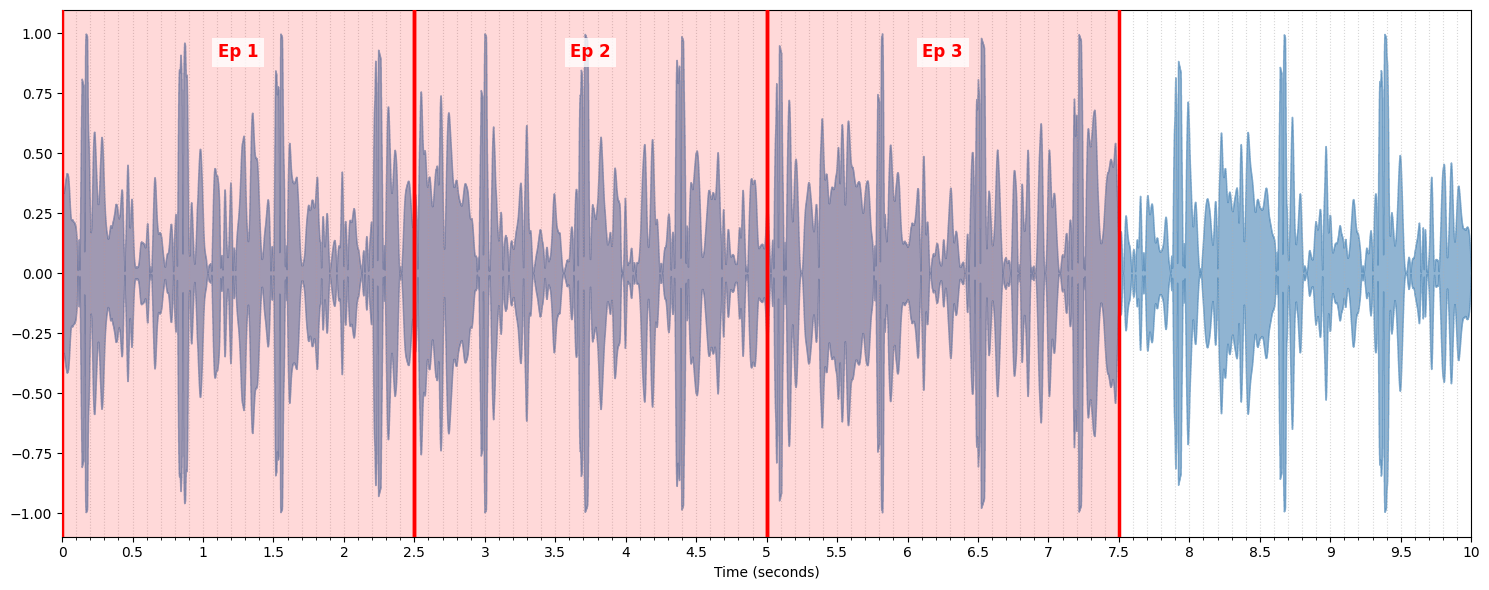

Visualizing segmented epochs for: b0008_noisy

[Epoch Calculations: b0008_noisy]
  > Epoch 1: 0.0000s to 2.5000s | Verified 2.50s Duration
  > Epoch 2: 2.5000s to 5.0000s | Verified 2.50s Duration
  > Epoch 3: 5.0000s to 7.5000s | Verified 2.50s Duration


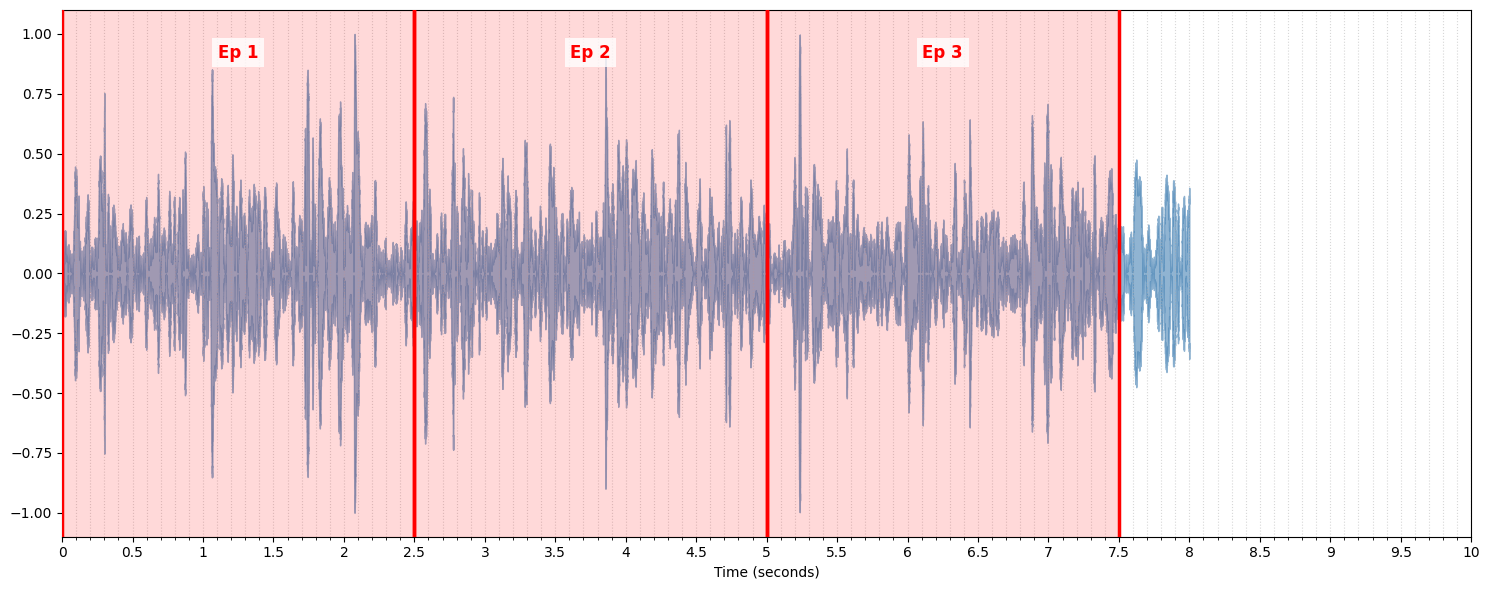

Visualizing segmented epochs for: b0008_time_fast

[Epoch Calculations: b0008_time_fast]
  > Epoch 1: 0.0000s to 2.5000s | Verified 2.50s Duration
  > Epoch 2: 2.5000s to 5.0000s | Verified 2.50s Duration
  > Epoch 3: 5.0000s to 7.5000s | Verified 2.50s Duration


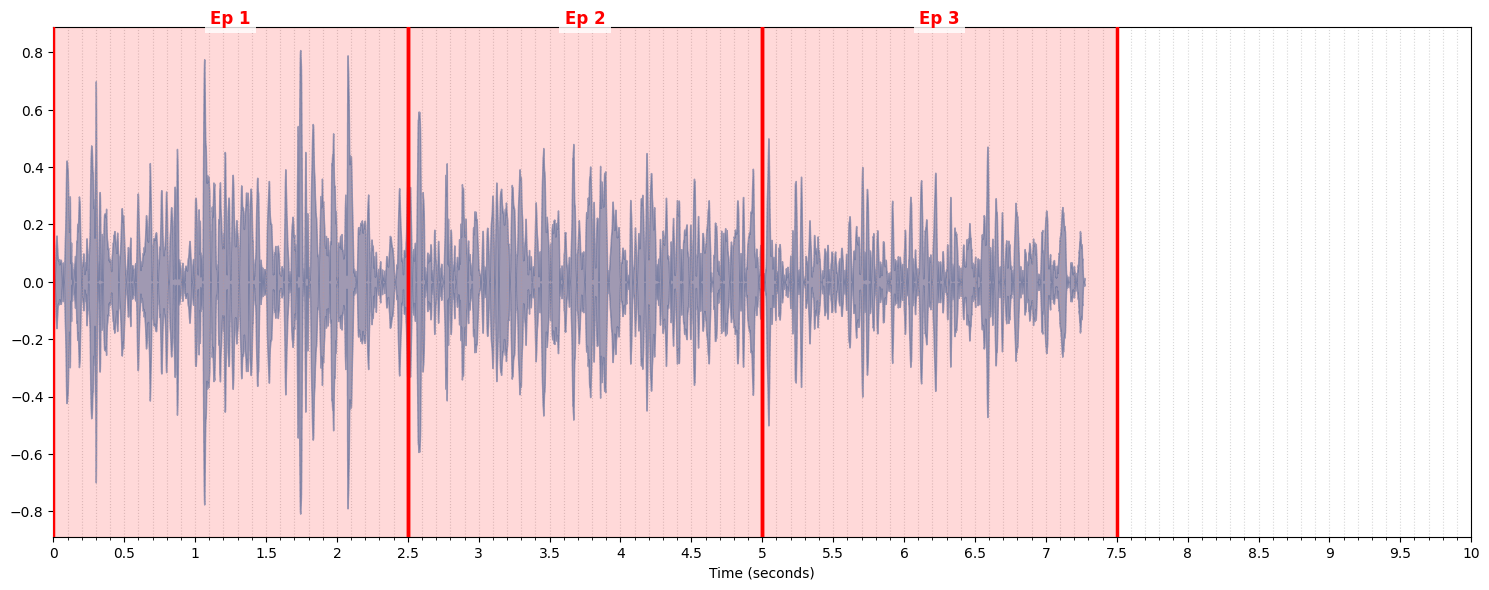

Visualizing segmented epochs for: b0008_time_slow

[Epoch Calculations: b0008_time_slow]
  > Epoch 1: 0.0000s to 2.5000s | Verified 2.50s Duration
  > Epoch 2: 2.5000s to 5.0000s | Verified 2.50s Duration
  > Epoch 3: 5.0000s to 7.5000s | Verified 2.50s Duration


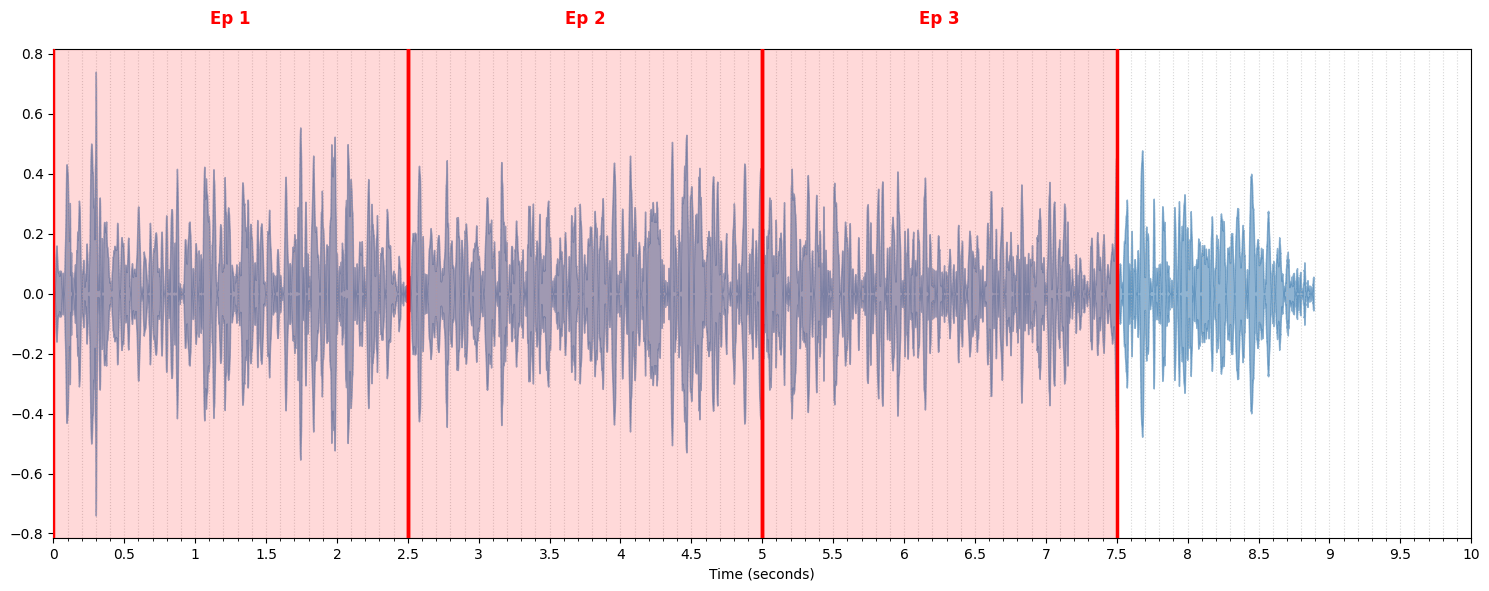

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def visualize_epochs_final_standardized(filename, source_folders, x_max=10.0):
    """
    PROFESSOR-READY VISUALIZATION:
    1. Standardizes X-axis to 10s (Identical visual widths).
    2. Snaps boundaries to 0.1s clinical markers.
    3. Clearly marks out Ep 1, Ep 2, Ep 3 within the grid.
    """
    raw_path = find_full_path(filename, source_folders)
    if not raw_path: return

    print(f"Visualizing segmented epochs for: {filename}")
    audio, sr = librosa.load(raw_path, sr=2000)

    # Run the Quantized Segment logic (Snap to 0.1s grid)
    # This ensures Ep 1 starts at 0.0 or 0.4, etc., not 0.429
    cut_indices = segment_heart_cycles_quantized(audio, sr=sr, debug=True)

    # 1. FIXED FIGURE SIZE for a clean presentation
    plt.figure(figsize=(15, 6))

    # 2. Waveform Plotting
    librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='steelblue')

    # 3. FIXED VIEWPORT: Syncs pixels-per-second across all recordings
    plt.xlim(0, x_max)

    # 4. GRANULAR AXIS: 0.5s Major ticks, 0.1s Minor ticks
    plt.xticks(np.arange(0, x_max + 0.5, 0.5))
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(0.1))

    # High-precision grid for audit
    plt.grid(True, axis='x', which='both', linestyle=':', alpha=0.5, zorder=1)

    # plt.title(f"Segmented Epochs: {filename}")
    plt.xlabel("Time (seconds)")

    print(f"\n[Epoch Calculations: {filename}]")
    for i, (start, end) in enumerate(cut_indices):
        s_sec = start / float(sr)
        e_sec = end / float(sr)

        # Draw precise boundaries (Red Lines) snapped to 0.1s grid points
        plt.axvline(x=s_sec, color='red', linewidth=2.5, zorder=10)
        plt.axvline(x=e_sec, color='red', linewidth=2.5, zorder=10)
        plt.axvspan(s_sec, e_sec, color='red', alpha=0.15, zorder=2)

        # Mark out the Epoch labels centered in the 2.5s window
        mid_point = (s_sec + e_sec) / 2
        plt.text(mid_point, 0.9, f"Ep {i+1}", ha='center', color='red',
                 fontweight='bold', fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

        # Clinical proof of 2.5000s duration
        duration = e_sec - s_sec
        print(f"  > Epoch {i+1}: {s_sec:.4f}s to {e_sec:.4f}s | Verified {duration:.2f}s Duration")

    plt.tight_layout()
    plt.show()

# Run validation for both back-to-back
visualize_epochs_final_standardized('e01004', original_training_folder_list)
# visualize_epochs_final_standardized('b0471_noisy', augmented_folder_list)
visualize_epochs_final_standardized('b0008_noisy', augmented_folder_list)
visualize_epochs_final_standardized('b0008_time_fast', augmented_folder_list)
visualize_epochs_final_standardized('b0008_time_slow', augmented_folder_list)


In [44]:
print("--- ⚠️ SMOKE TEST (First 20 Files Only) ---")

# Slice the input lists to just 20 files
test_filenames = train_x_orig[:20]
test_labels = train_y_orig[:20]

try:
    # Run the V3 pipeline on this tiny batch
    _, X_debug, y_debug = run_preprocessing_job(
        filenames=test_filenames,
        labels=test_labels,
        source_folders=original_training_folder_list,
        output_dir_name='debug_v3_test', # Saves to a temp folder
        pipeline_version='v3',
        n_jobs=2 # Low parallelism for debugging
    )

    print("\n✅ SMOKE TEST PASSED.")
    print(f"Input: 20 files -> Output: {len(y_debug)} samples (Expected 60)")
    print(f"Shape: {X_debug.shape}")
    print(">> SAFE TO RUN FULL JOB.")

except Exception as e:
    print(f"\n❌ SMOKE TEST FAILED: {e}")
    print(">> DO NOT RUN FULL JOB. FIX THE BUG FIRST.")

--- ⚠️ SMOKE TEST (First 20 Files Only) ---
--- JOB: debug_v3_test | Version: V3 ---
Found existing files. Loading from disk....

✅ SMOKE TEST PASSED.
Input: 20 files -> Output: 60 samples (Expected 60)
Shape: (60, 168)
>> SAFE TO RUN FULL JOB.


In [45]:
print(f"\n --- PROCESSING V3 DATA (Heart Segmentation) ---")

_, X_train_v3, y_train_v3 = run_preprocessing_job(
    filenames=train_x_orig,
    labels=train_y_orig,
    source_folders=original_training_folder_list,
    output_dir_name='train_orig',
    pipeline_version='v3'
)

_, X_val_v3, y_val_v3 = run_preprocessing_job(
    filenames=val_x_orig,
    labels=val_y_orig,
    source_folders=original_training_folder_list,
    output_dir_name='val_orig',
    pipeline_version='v3'
)

_, X_test_v3, y_test_v3 = run_preprocessing_job(
    filenames=test_x_orig,
    labels=test_y_orig,
    source_folders=test_folder_list,
    output_dir_name='test_orig',
    pipeline_version='v3'
)

_, X_aug_v3, y_aug_v3 = run_preprocessing_job(
    filenames=train_x_aug,
    labels=train_y_aug,
    source_folders=augmented_folder_list,
    output_dir_name='train_aug',
    pipeline_version='v3'
)


 --- PROCESSING V3 DATA (Heart Segmentation) ---
--- JOB: train_orig | Version: V3 ---
Found existing files. Loading from disk....
--- JOB: val_orig | Version: V3 ---
Found existing files. Loading from disk....
--- JOB: test_orig | Version: V3 ---
Found existing files. Loading from disk....
--- JOB: train_aug | Version: V3 ---
Found existing files. Loading from disk....



--- Starting Experiment 2.3: (Segmented Heart Cycles + Majority Voting) ---
Training V3 Balanced SVM on 10617 samples...
SVM training complete.

 --- V3 Validation Results ---
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98       470
    Abnormal       0.79      0.96      0.87        57

    accuracy                           0.97       527
   macro avg       0.89      0.97      0.92       527
weighted avg       0.97      0.97      0.97       527

Positive Predictive Value (PPV): 0.7857
Negative Predictive Value (NPV): 0.9956
Area Under Curve (AUC):        0.9962


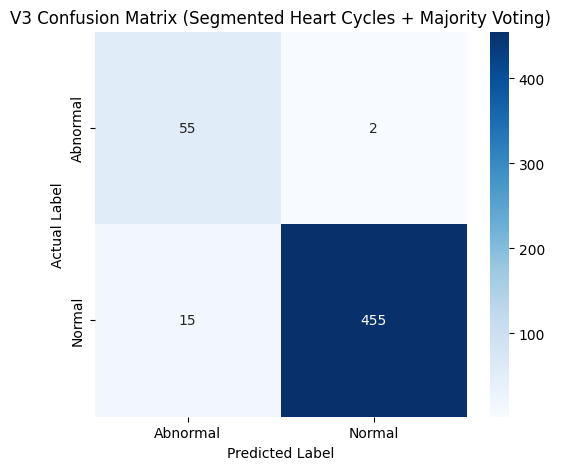

In [46]:

print("\n--- Starting Experiment 2.3: (Segmented Heart Cycles + Majority Voting) ---")

# 0. Load Data (Recovery Mode)
train_orig_dir = os.path.join(base_output_dir, 'train_orig')
train_aug_dir  = os.path.join(base_output_dir, 'train_aug')
val_dir        = os.path.join(base_output_dir, 'val_orig')

X_orig = np.load(os.path.join(train_orig_dir, 'train_orig_1d_features_segmented.npy'))
y_orig = np.load(os.path.join(train_orig_dir, 'train_orig_labels_segmented.npy'))
X_aug = np.load(os.path.join(train_aug_dir, 'train_aug_1d_features_segmented.npy'))
y_aug = np.load(os.path.join(train_aug_dir, 'train_aug_labels_segmented.npy'))
X_val_v3 = np.load(os.path.join(val_dir, 'val_orig_1d_features_segmented.npy'))
y_val_v3 = np.load(os.path.join(val_dir, 'val_orig_labels_segmented.npy'))

# 1. Stack Data
X_train_balanced_v3 = np.vstack((X_orig, X_aug))
y_train_balanced_v3 = np.concatenate((y_orig, y_aug))

# 2. Scale Data
scaler_v3 = StandardScaler()
X_train_v3_scaled = scaler_v3.fit_transform(X_train_balanced_v3)
X_val_v3_scaled = scaler_v3.transform(X_val_v3)

# 3. Train SVM
print(f"Training V3 Balanced SVM on {X_train_balanced_v3.shape[0]} samples...")
svm_v3 = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_v3.fit(X_train_v3_scaled, y_train_balanced_v3)
print("SVM training complete.")

# 4. Evaluation (Majority Voting)
y_pred_epoch = svm_v3.predict(X_val_v3_scaled)
y_prob_epoch = svm_v3.predict_proba(X_val_v3_scaled)[:, 1]

# Reshape for Voting
n_patients = len(y_val_v3) // 3
y_pred_reshaped = y_pred_epoch.reshape(n_patients, 3)
y_prob_reshaped = y_prob_epoch.reshape(n_patients, 3)
y_true_reshaped = y_val_v3.reshape(n_patients, 3)

# Vote Logic
patient_votes = np.sum(y_pred_reshaped, axis=1)
y_pred_patient = (patient_votes >= 2).astype(int)
y_prob_patient = np.mean(y_prob_reshaped, axis=1)
y_true_patient = y_true_reshaped[:, 0]

# 5. Results (Matches Experiment 1 Layout)
print("\n --- V3 Validation Results ---")
# target_names reversed to match specific request if needed, but standard is [0, 1]
print(classification_report(y_true_patient, y_pred_patient, target_names=['Normal', 'Abnormal']))

# Calculate Metrics (Exactly like Experiment 1)
# labels=[1, 0] extracts TP (Abnormal) from top-left, TN (Normal) from bottom-right
tp, fn, fp, tn = confusion_matrix(y_true_patient, y_pred_patient, labels=[1, 0]).ravel()

ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
npv = tn / (tn + fn) if (tn + fn) > 0 else 0
auc = roc_auc_score(y_true_patient, y_prob_patient)

print(f"Positive Predictive Value (PPV): {ppv:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")
print(f"Area Under Curve (AUC):        {auc:.4f}")
plot_confusion_matrix(y_true_patient, y_pred_patient, title='V3 Confusion Matrix (Segmented Heart Cycles + Majority Voting)')
